# Baseball Win Prediction Model Development

## Prelude:
 This dataset is extracted from 2014 Major League Baseball. Baseball is a very popular sport. Each team wants maximize their winnings. We are given the attributes for a team to win. By this data we can check the strong and lacking areas for a team to increase their chances of winning the tournament.

### About the Independent variables:

1. 2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error

2. 3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error

3. AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction

4. AB/HR – At bats per home run: at bats divided by home runs

5. BA – Batting average (also abbreviated AVG): hits divided by at bats (H/AB)

6. BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.

7. H – Hit: reaching base because of a batted, fair ball without error by the defense

8. HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error

9. HR/H – Home runs per hit: home runs divided by total hits

10. R – Runs scored: number of times a player crosses home plate

11. SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense

12. CG – Complete game: number of games where player was the only pitcher for their team

13. ER – Earned run: number of runs that did not occur as a result of errors or passed balls

14. SO – Strikeout: number of batters who received strike three

15.	ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched

16.	RA – Run average: number of runs allowed times nine divided by innings pitched

17.	SHO – Shutout: number of complete games pitched with no runs allowed

18.	SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

19. E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result


### About the dependent variable:
W- Number of predicted wins, number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work 

### Problem Statement:
We need to build a regression model to maximise the number of wins (W) based on the independent variables we are given.

In [1]:
# Importing necessary packages

# Importing fundamental packages
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell        ## To display multiple outputs
InteractiveShell.ast_node_interactivity = "all"
import pyforest            

## For visualization
import matplotlib.pyplot as plt                                         
%matplotlib inline

import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

## Data Pre-Processing Packages
from scipy.stats import chi2_contingency
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.datasets import make_friedman1
from sklearn.svm import LinearSVR
from sklearn.preprocessing import scale
import optunity



## To create copy of data
import copy

## Pipeline Packages

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# For Building Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor



## Evaluation Metrics Packages
import statsmodels.api as sm
from scipy.stats import f
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
import optunity.metrics
from sklearn.model_selection import cross_val_score

# Saving the model
import pickle


Populating the interactive namespace from numpy and matplotlib


In [2]:
def read(link):
    global data

    data=pd.read_csv(link)
    
    data=pd.DataFrame(data)
    print(data)

In [3]:
read(link="baseball.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

      W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26  230  486  1392  121  618  572

In [4]:
### Adding New features to the data for better understanding AB/HR and HR/H
df=pd.DataFrame(data)
df1=pd.DataFrame(data)
df["AB/HR"]= data["AB"]/data["HR"]
df1["HR/H"]=data["HR"]/data["H"]
data=pd.concat([data,df["AB/HR"],df1["HR/H"]],axis=1)
# Removing Duplicate
data=data.T.drop_duplicates().T

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
def eda(mydata):                                    # Defining function
    
    pd.set_option("display.max_rows", None)         # to display all rows
    pd.set_option("display.max_columns", None)       #to display all columns
    
    print(mydata.head())                              # to display first 10 records
    print("\n")                               
    print(mydata.tail())                              # to display last 10 records
    print("\n")
    print("\n")
    
    print(mydata.info())                               # to understand attributes of the data
    
    print(mydata.describe())                          # to get descriptive statistics
    print("\n")
    print("\n")
    print("Skewness for the data","\n",mydata.skew())       # to get skewness of the data, skewness=0 for normal distribution
    print("\n")
    print("Kurosis for the data","\n",mydata.kurtosis() )            # to get kutosis, kurtosis <=3 for normal distribution
    print("\n")
    print("\n")
    
    

In [6]:
eda(mydata=data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

      W      R      AB       H     2B    3B     HR     BB      SO     SB  \
0  95.0  724.0  5575.0  1497.0  300.0  42.0  139.0  383.0   973.0  104.0   
1  83.0  696.0  5467.0  1349.0  277.0  44.0  156.0  439.0  1264.0   70.0   
2  81.0  669.0  5439.0  1395.0  303.0  29.0  141.0  533.0  1157.0   86.0   
3  76.0  622.0  5533.0  1381.0  260.0  27.0  136.0  404.0  1231.0   68.0   
4  74.0  689.0  5605.0  1515.0  289.0  49.0  151.0  455.0  1259.0   83.0   

      RA     ER   ERA    CG   SHO    SV      E      AB/HR      HR/H  
0  641.0  601.0  3.73   2.0   8.0  56.0   88.0  40.107914  0.092852  
1  700.0  653.0  4.07   2.0  12.0  45.0   86.0  35.044872  0.115641  
2  640.0  584.0  3.67  11.0  10.0  38.0   79.0  38.574468  0.101075  
3  701.0  643.0  3.98   7.0   9.0  37.0  101.0  40.683824  0.098479  
4  803.0  746.0  4.64   7.0  12.0  35.0   86.0  37.119205  0.099670  


       W      R      AB       H     2B    3B     HR     BB      SO     SB  \
25  92.0  667.0  5385.0  1346.0  263.0  26.0

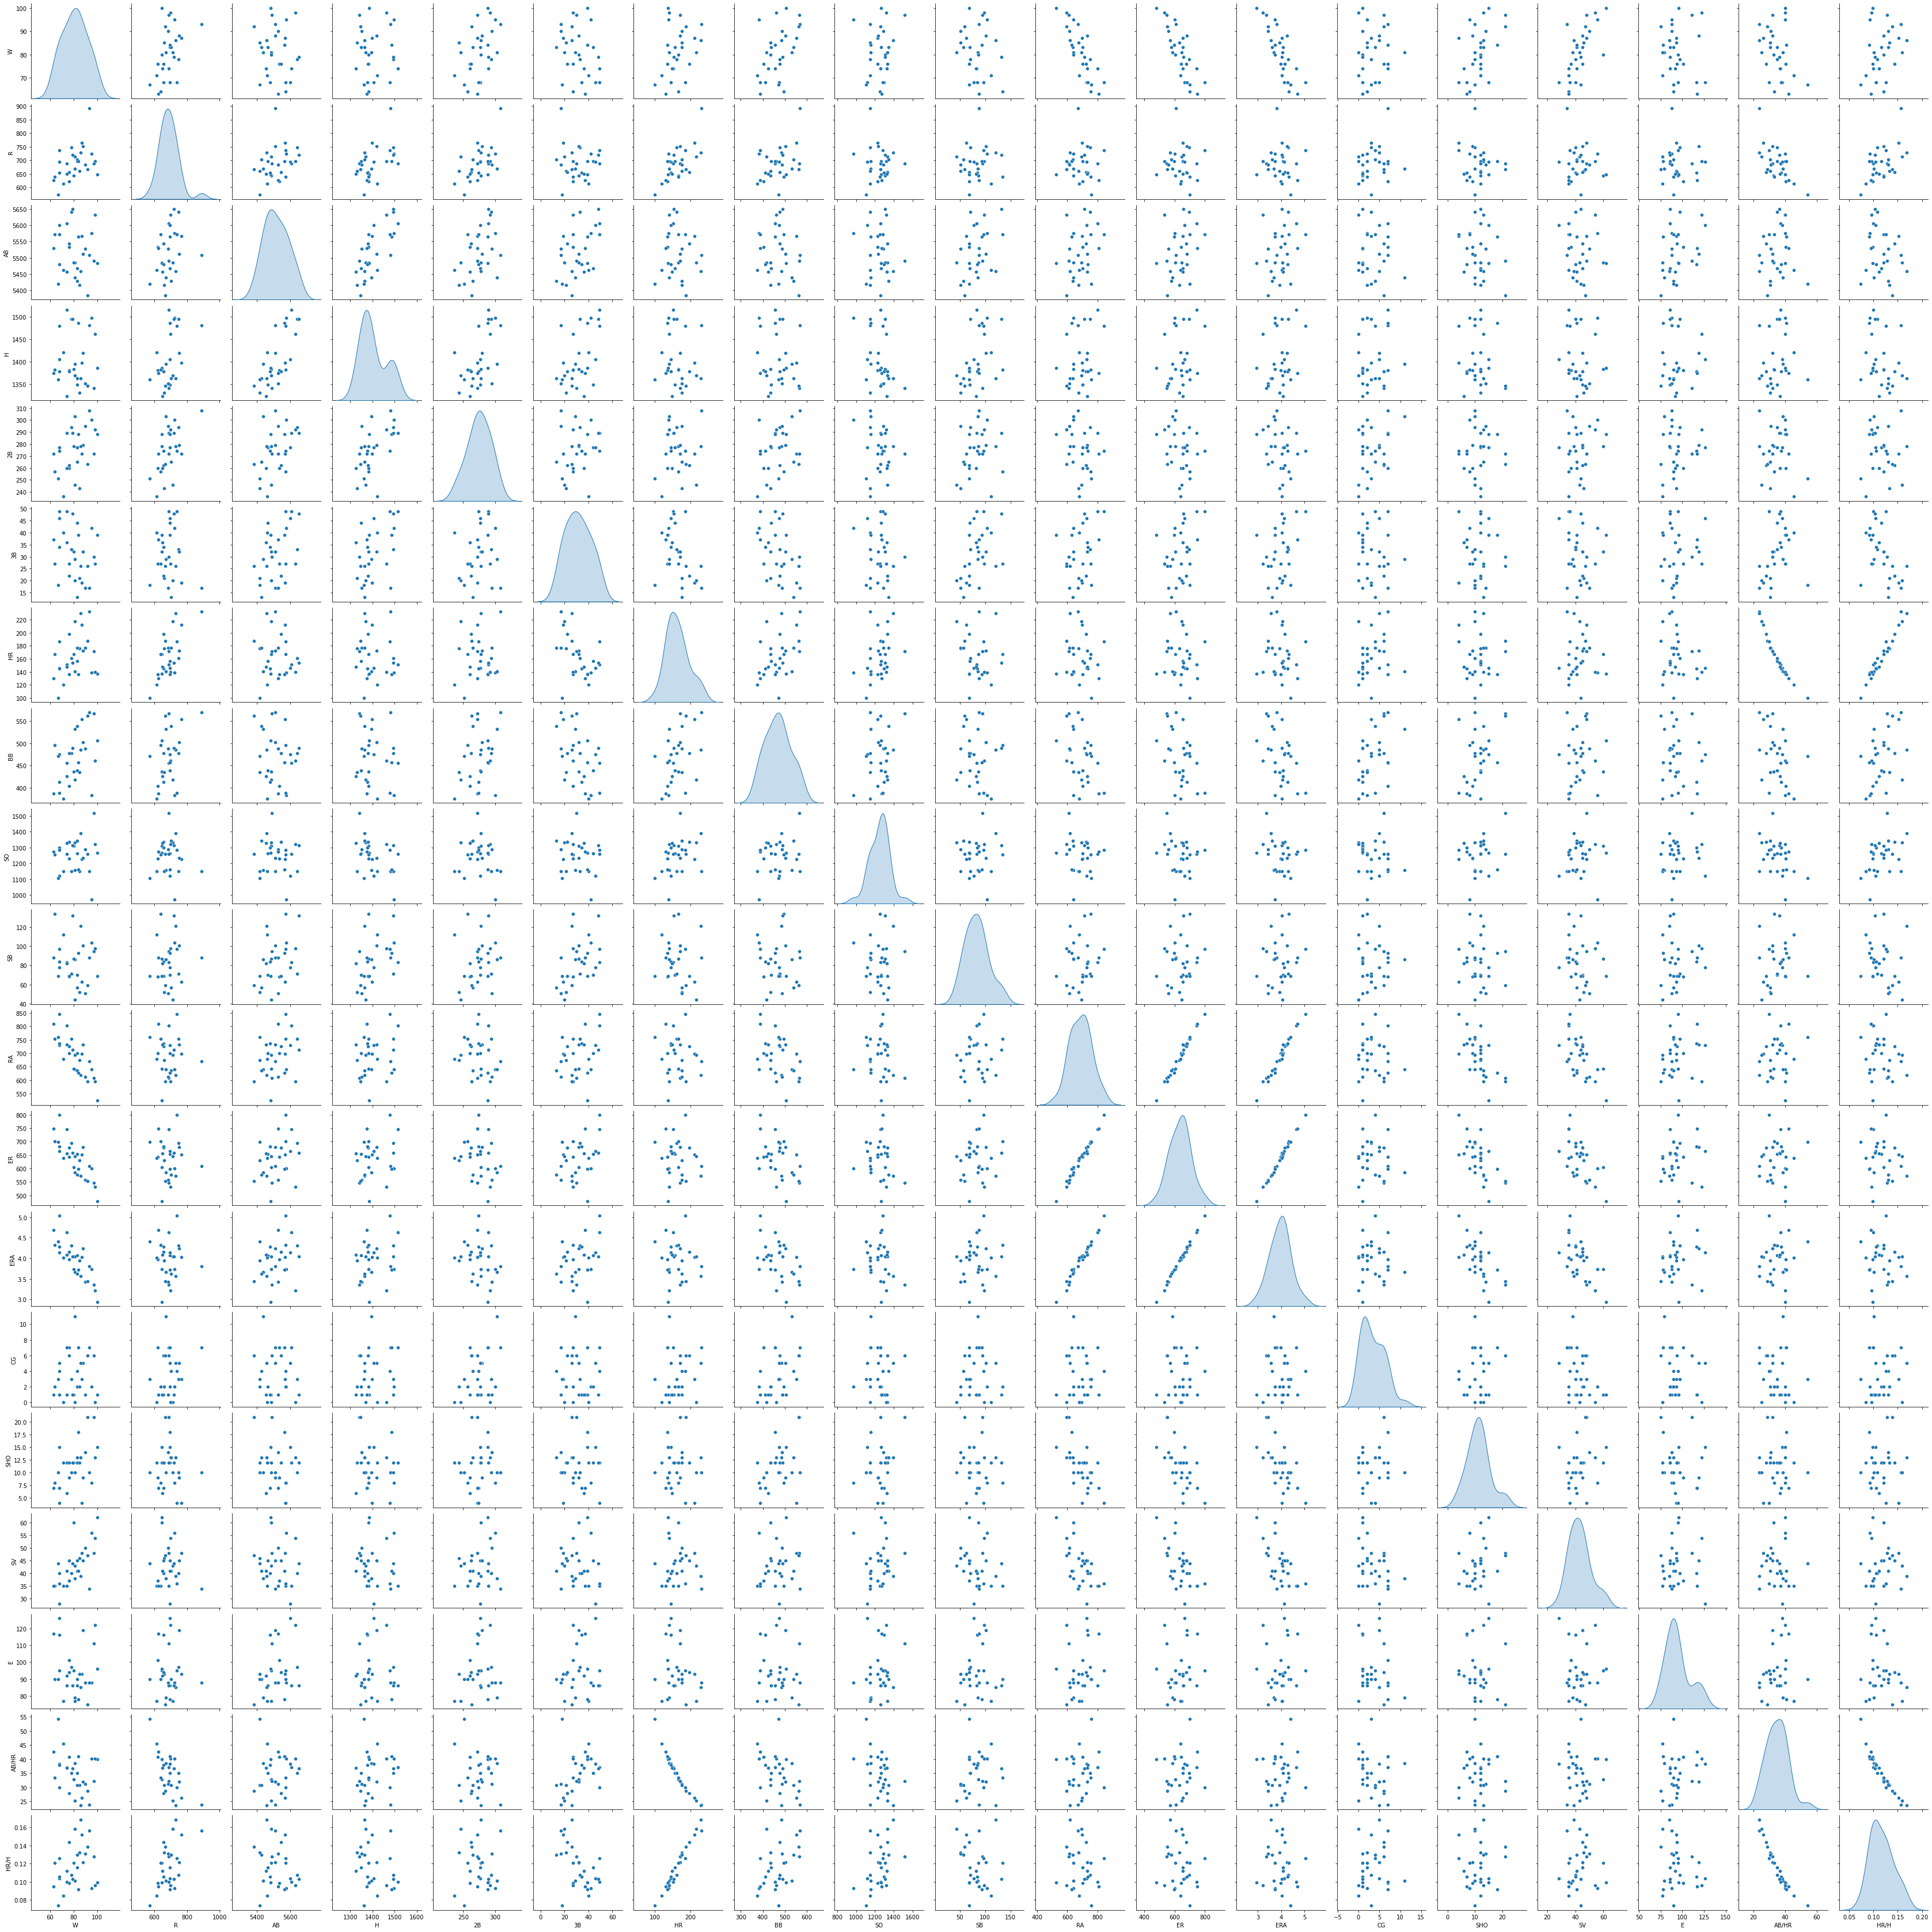

In [7]:
sns.pairplot(data, kind='scatter', diag_kind='kde')                       # to represent data graphically
print("\n")
print("\n")       

<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:>

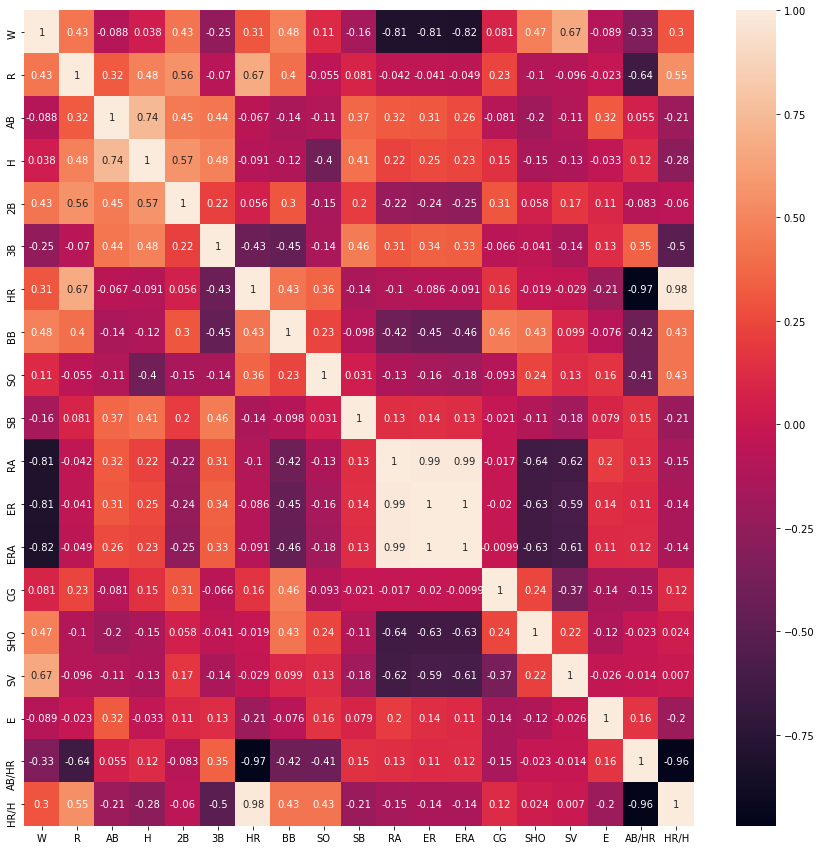

In [8]:
plt.figure(figsize=(15,15))                      # plotting heat map to check correlation
sns.heatmap(data.corr(method = "pearson"), annot = True)
print("\n") 

In [9]:
def outlier(mydata):                        # Outlier Plotting
    for i in mydata.columns:
        fig = px.box(mydata, y= i, width=600, height=400, title=i, template="plotly_dark")
        fig.show()

In [10]:
outlier(mydata=data)

In [11]:
## Histogram for all the variables using plotly_express by 'quality'

for i in data.columns:
    fig = px.histogram(data, x= i, histfunc = "count", color = "W", 
                       width=1000, height=800, title = "Histogram for " + i, 
                       template="plotly_dark", cumulative=True)

    fig.show() 

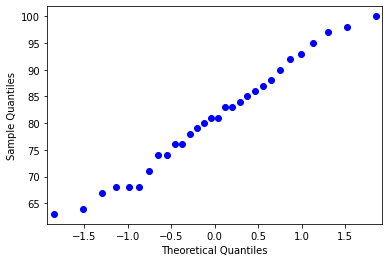

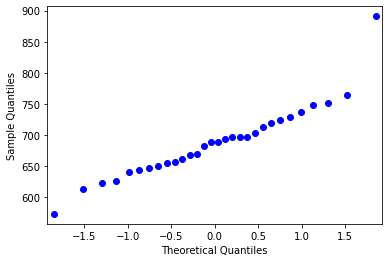

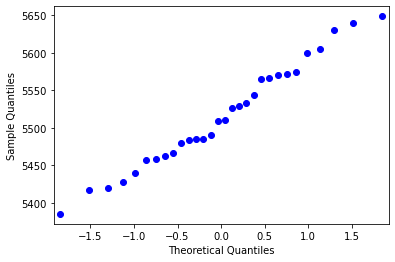

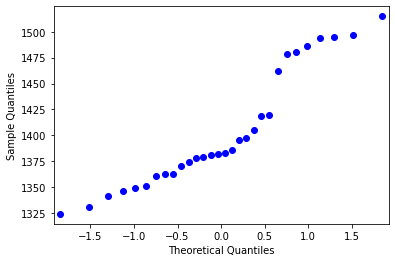

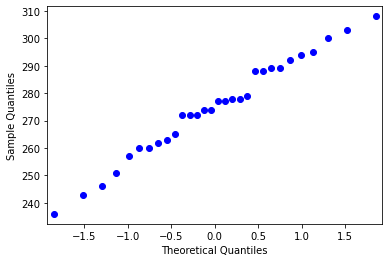

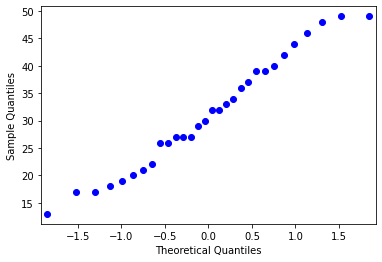

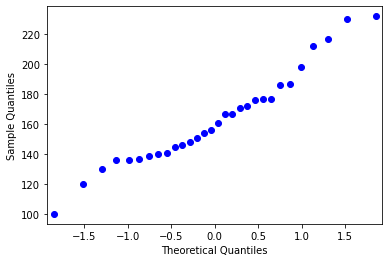

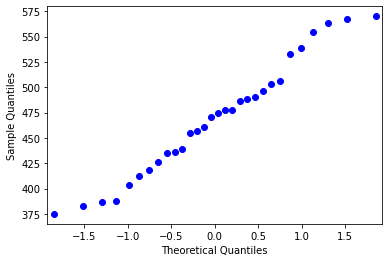

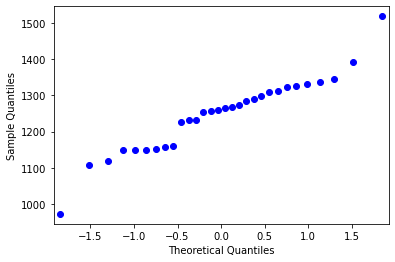

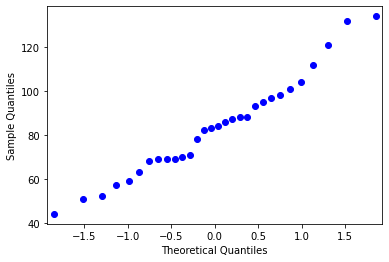

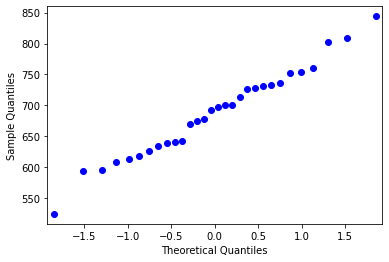

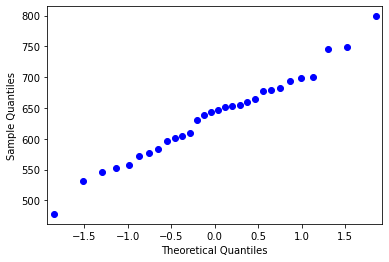

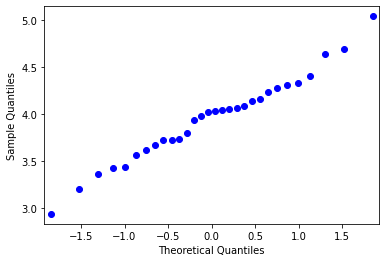

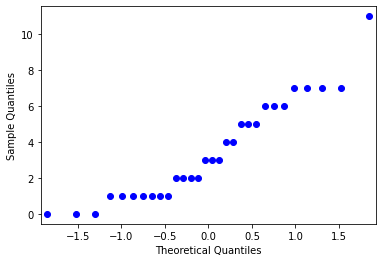

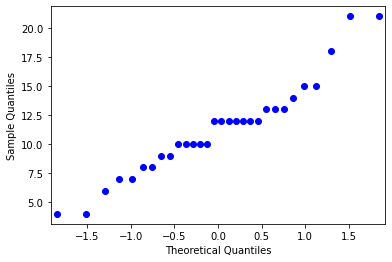

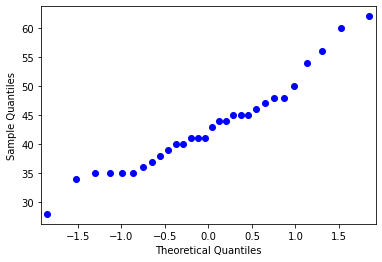

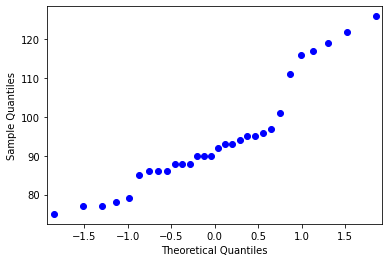

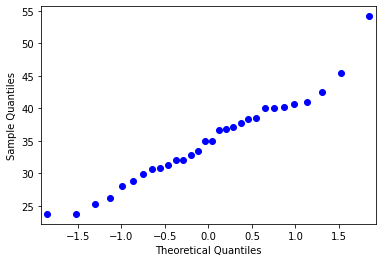

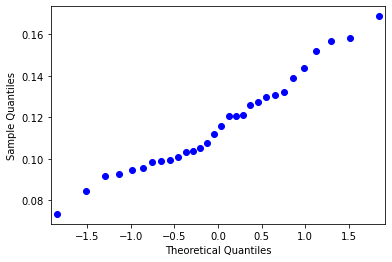

In [12]:
# Plotting qq plot

for i in data.columns:
    fig = sm.qqplot(data[i])

    fig.show() 
    

<AxesSubplot:xlabel='R', ylabel='W'>

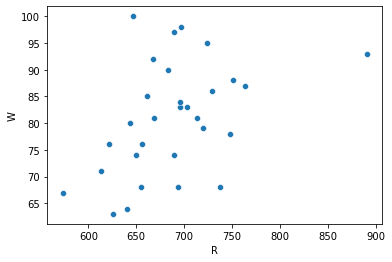

In [13]:
# Scatterplot for R and W

sns.scatterplot(x="R",y="W",data=data)

<AxesSubplot:xlabel='R', ylabel='Density'>

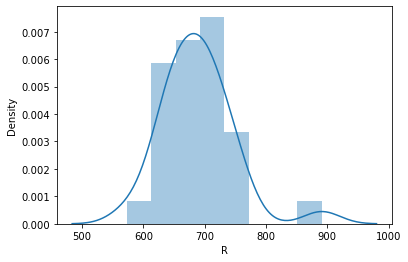

In [14]:
sns.distplot(data["R"])

<AxesSubplot:xlabel='AB', ylabel='W'>

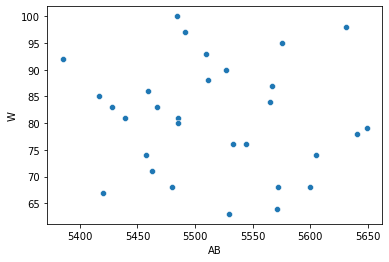

In [15]:
# Scatterplot for AB and W

sns.scatterplot(x="AB",y="W",data=data)

<AxesSubplot:xlabel='AB', ylabel='Density'>

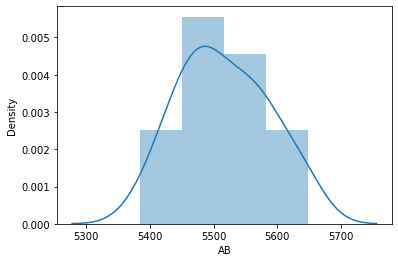

In [16]:
sns.distplot(data["AB"])

<AxesSubplot:xlabel='H', ylabel='W'>

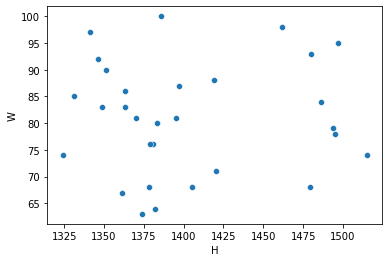

In [17]:
# Scatterplot for H and W

sns.scatterplot(x="H",y="W",data=data)

<AxesSubplot:xlabel='H', ylabel='Density'>

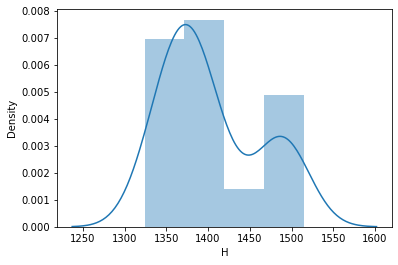

In [18]:
sns.distplot(data["H"])

<AxesSubplot:xlabel='2B', ylabel='W'>

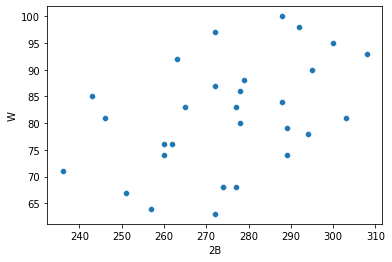

In [19]:
# Scatterplot for 2B and W

sns.scatterplot(x="2B",y="W",data=data)

<AxesSubplot:xlabel='2B', ylabel='Density'>

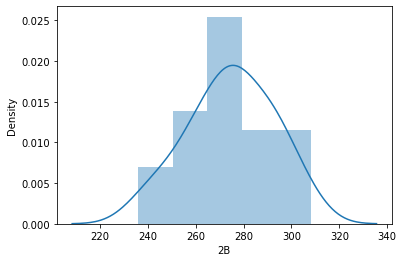

In [20]:
sns.distplot(data["2B"])

<AxesSubplot:xlabel='3B', ylabel='W'>

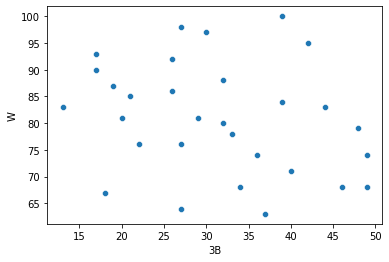

In [21]:
# Scatterplot for 3B and W

sns.scatterplot(x="3B",y="W",data=data)

<AxesSubplot:xlabel='3B', ylabel='Density'>

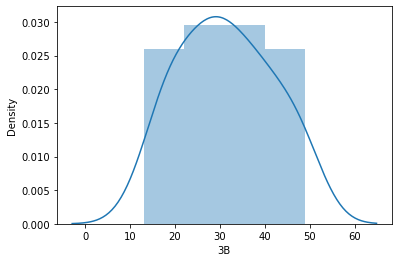

In [22]:
sns.distplot(data["3B"])

<AxesSubplot:xlabel='HR', ylabel='W'>

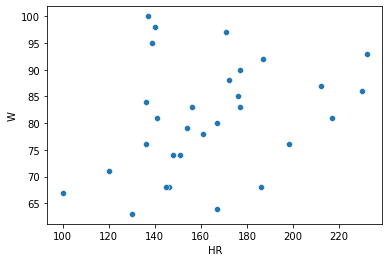

In [23]:
# Scatterplot for HR and W

sns.scatterplot(x="HR",y="W",data=data)

<AxesSubplot:xlabel='HR', ylabel='Density'>

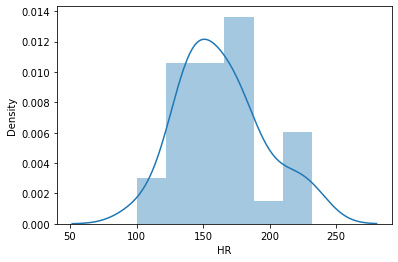

In [24]:
sns.distplot(data["HR"])

<AxesSubplot:xlabel='BB', ylabel='W'>

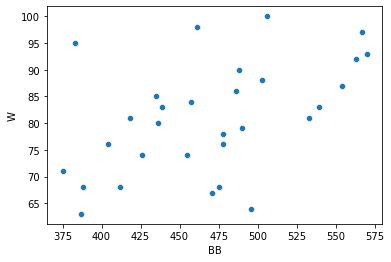

In [25]:
# Scatterplot for BB and W

sns.scatterplot(x="BB",y="W",data=data)

<AxesSubplot:xlabel='BB', ylabel='Density'>

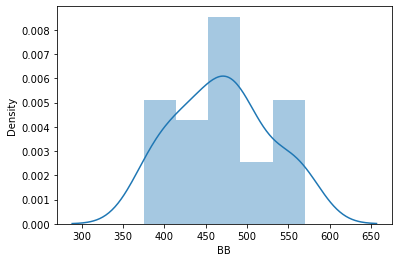

In [26]:
sns.distplot(data["BB"])

<AxesSubplot:xlabel='SO', ylabel='W'>

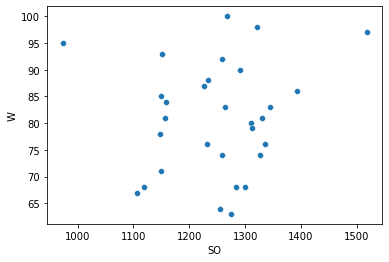

In [27]:
# Scatterplot for SO and W

sns.scatterplot(x="SO",y="W",data=data)

<AxesSubplot:xlabel='SO', ylabel='Density'>

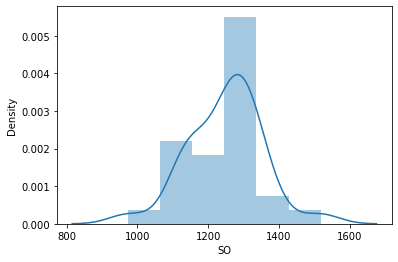

In [28]:
sns.distplot(data["SO"])

<AxesSubplot:xlabel='SB', ylabel='W'>

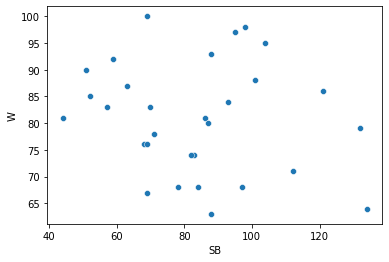

In [29]:
# Scatterplot for SB and W

sns.scatterplot(x="SB",y="W",data=data)

<AxesSubplot:xlabel='SB', ylabel='Density'>

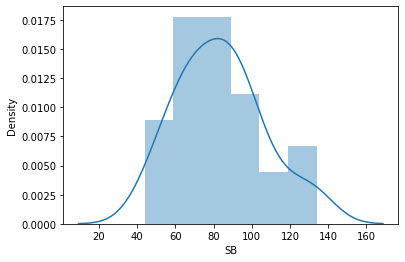

In [30]:
sns.distplot(data["SB"])

<AxesSubplot:xlabel='RA', ylabel='W'>

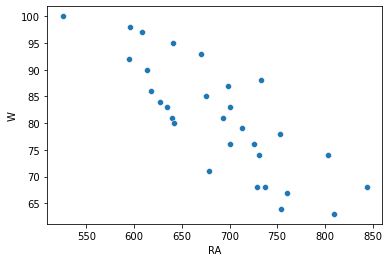

In [31]:
# Scatterplot for RA and W

sns.scatterplot(x="RA",y="W",data=data)

<AxesSubplot:xlabel='RA', ylabel='Density'>

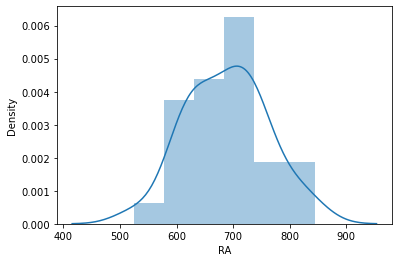

In [32]:
sns.distplot(data["RA"])

<AxesSubplot:xlabel='ER', ylabel='W'>

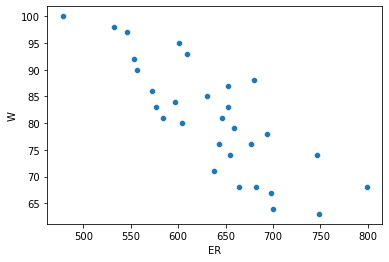

In [33]:
# Scatterplot for ER and W

sns.scatterplot(x="ER",y="W",data=data)

<AxesSubplot:xlabel='ER', ylabel='Density'>

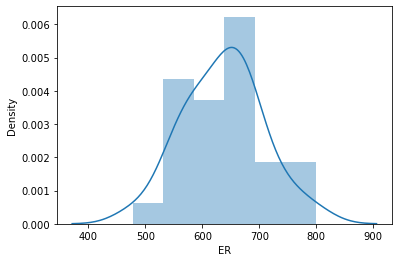

In [34]:
sns.distplot(data["ER"])

<AxesSubplot:xlabel='ERA', ylabel='W'>

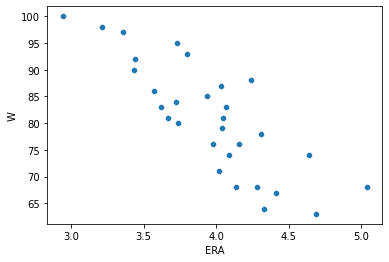

In [35]:
# Scatterplot for ERA and W

sns.scatterplot(x="ERA",y="W",data=data)

<AxesSubplot:xlabel='ERA', ylabel='Density'>

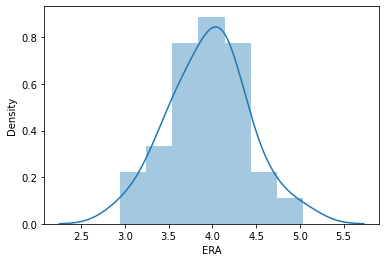

In [36]:
sns.distplot(data["ERA"])

<AxesSubplot:xlabel='CG', ylabel='W'>

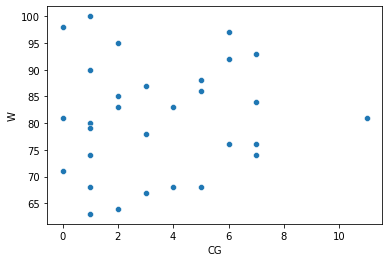

In [37]:
# Scatterplot for CG and W

sns.scatterplot(x="CG",y="W",data=data)

<AxesSubplot:xlabel='CG', ylabel='Density'>

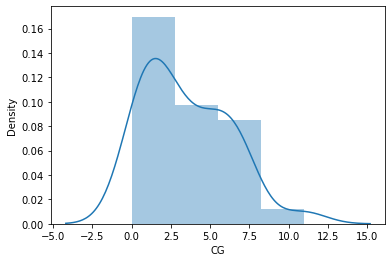

In [38]:
sns.distplot(data["CG"])

<AxesSubplot:xlabel='SHO', ylabel='W'>

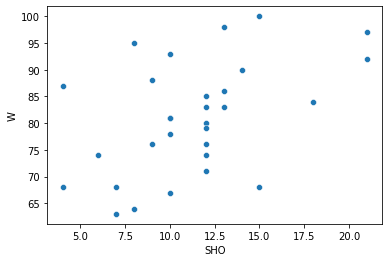

In [39]:
# Scatterplot for SHO and W

sns.scatterplot(x="SHO",y="W",data=data)

<AxesSubplot:xlabel='SHO', ylabel='Density'>

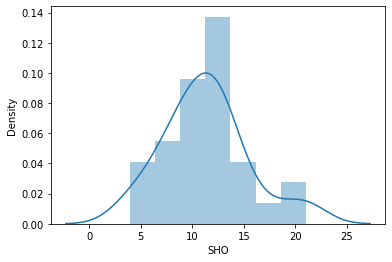

In [40]:
sns.distplot(data["SHO"])

<AxesSubplot:xlabel='SV', ylabel='W'>

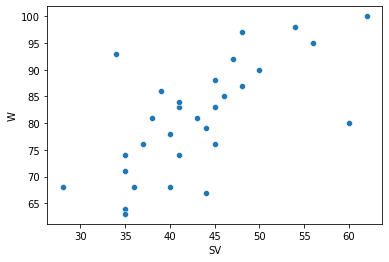

In [41]:
# Scatterplot for SV and W

sns.scatterplot(x="SV",y="W",data=data)

<AxesSubplot:xlabel='SV', ylabel='Density'>

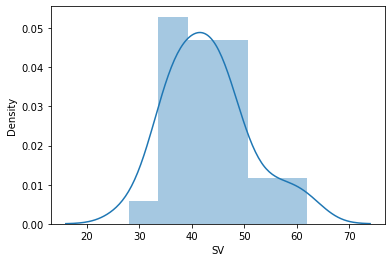

In [42]:
sns.distplot(data["SV"])

<AxesSubplot:xlabel='E', ylabel='W'>

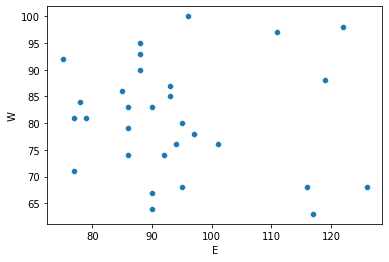

In [43]:
# Scatterplot for E and W

sns.scatterplot(x="E",y="W",data=data)

<AxesSubplot:xlabel='E', ylabel='Density'>

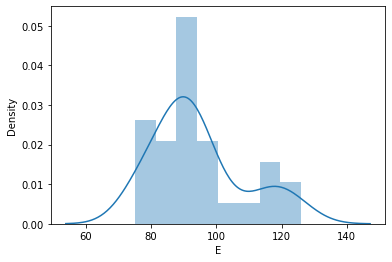

In [44]:
sns.distplot(data["E"])

<AxesSubplot:xlabel='AB/HR', ylabel='W'>

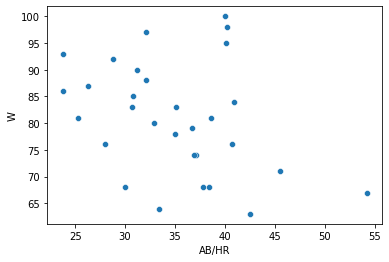

In [45]:
# Scatterplot for AB/HR and W

sns.scatterplot(x="AB/HR",y="W",data=data)

<AxesSubplot:xlabel='AB/HR', ylabel='Density'>

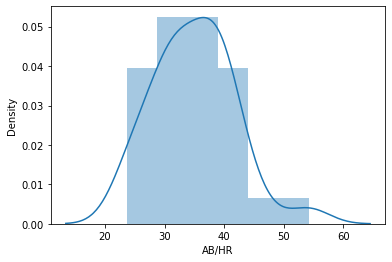

In [46]:
sns.distplot(data["AB/HR"])

<AxesSubplot:xlabel='HR/H', ylabel='W'>

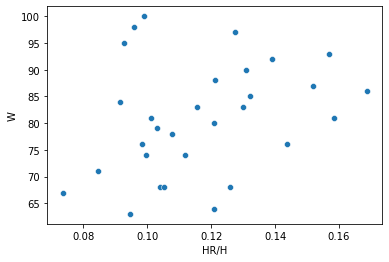

In [47]:
# Scatterplot for HR/H and W

sns.scatterplot(x="HR/H",y="W",data=data)

<AxesSubplot:xlabel='HR/H', ylabel='Density'>

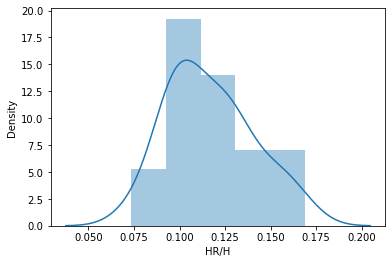

In [48]:
sns.distplot(data["HR/H"])

In [49]:
def calc_vif(data):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

    return(vif)

In [50]:
calc_vif(data=data.drop(["W"],axis=1))

<IPython.core.display.Javascript object>

variables            VIF
0          R    1669.786551
1         AB   68365.916025
2          H   51054.417170
3         2B     992.832618
4         3B      40.702055
5         HR   37742.146158
6         BB     291.759032
7         SO     413.551141
8         SB      34.935463
9         RA   18849.370520
10        ER  123124.984055
11       ERA   77037.585302
12        CG       7.664410
13       SHO      37.302704
14        SV     171.606286
15         E     114.012321
16     AB/HR     913.130536
17      HR/H   39301.525047

## Findings:

1. The schema of our dataset is  30 rows and 19 columns.

2. There are no missing values.

3. There are outliers and skewness present in the data.

4. Average Wins are vry close to 81 (80.97) with maximum of 100 and minimum of 63.

5. Average number of times a player scores is 688 with maximum of 891 and minimum of 573.

6. Average number of times a player is at base is 5516 with maximum of 5649 and having minimum 5385. Here we see consistency and not much deviation from mean.

7. Average hits by a player is 1403 with maximum of 1515 and having minimum 1324. Here we see inconsistency and mean is closer to lower range of the data. Player needs to have more hits.

8. Average number of times a player reaches base no. 2 in a single shot is 275 (274.73) with maximum of 308 and having minimum 236. Here we see consistency and not much deviation from mean.

9. Average number of times a player reaches base no.3 in a single shot is 31 with maximum of 49 and having minimum 13. Here we see inconsistency as there is a relatively more deviation from mean. 

10. Average number of times a player hits a home run is 163 with maximum of 232 and having minimum 100. Here we see inconsistency as there is a relatively more deviation from mean.

11. Average number of times a player is awarded first base is 469 with maximum of 570 and having minimum 375. Here we see inconsistency as there is a relatively more deviation from mean. This could be because bad or strategical pitching by other team player is not in our control. However, with its frequency we can raise our chances of wins.

12. Average number of times a batter is received strike-out is 1248 with 1518 being maximum and 973 being minimum. Here we see consistency. If we can focus in training our batters more for accuracy we can lower the strike-outs resulting in more runs and better winning chances.

13. Average number times our batter steals a base is 83 with 134 being maximum and 44 as minimum. This is a cheeky way of earning runs and could help our winning percentage. 

14. Average runs a player scores is 688 having maximum as 844 and minimum being 525. Here we see relatively equal deviation from mean portrating consistency. 

15. Average number of times our batter earns a run is 636 (635.83) with a maximum of 799 and minimum of 478. We need to provide more training to our batters to score runs consistently.

16. Average ERA too is low which points out problem area.

17. Avrage of completed games is towards the lower range of data which depicts other problem area. We need to have more pitchers to have more variety and lower the dependency on very limited pitchers.

18. Average shutout needs to be improved as it's more towards the lower range of the data.

19. Average saves can be improved as it is between 50%-75% but more toward the start of 50%. This shows there's room for improvement by training.

20. Averagare eroors our fielders commit is also towards the higher side. By cutting down on errors our chances for wins increases.

21. Batter per home run has statistics towards the lower range of the data showing less chances of home run. It needs to be improved by training.

22. Home run per hits too needs to be improved as the average is low.

## Data Cleaning

In [51]:
# Making a copy of dataset for cleaning and model building purpose

data2= copy.deepcopy(data)

In [52]:
def convert1(val):
    if val <= 90:
        return 0        # Low 
    elif  val <= 105:
        return 1        # Mid 
    else:
        return 2        # High

In [53]:
data2['E'] = data['E'].apply(convert1)

In [54]:
def convert1(val):
    if val <= 4:
        return 0        # less completed games
    elif  val <= 8:
        return 1        # Medium completed games
    else:
        return 2        # High completed games

In [55]:
data2['CG'] = data['CG'].apply(convert1)

In [56]:
def convert1(val):
    if val <= 10:
        return 0        # Less
    else  :
        return 1        # High
    

In [57]:
data2['SHO'] = data['SHO'].apply(convert1)

In [58]:
# Anova for Errors and Wins
mod=ols('W~E',data=data2).fit()

# Performing Anova
avotable= sm.stats.anova_lm(mod)
print("\n")
# Print result
print(avotable)



            df       sum_sq     mean_sq         F    PR(>F)
E          1.0     8.267213    8.267213  0.073238  0.788665
Residual  28.0  3160.699454  112.882123       NaN       NaN


In [59]:
# Anova for Completed Games and Wins
mod=ols('W~CG',data=data2).fit()

# Performing Anova
avotable= sm.stats.anova_lm(mod)
print("\n")
# Print result
print(avotable)



            df       sum_sq     mean_sq         F    PR(>F)
CG         1.0    64.713043   64.713043  0.583704  0.451255
Residual  28.0  3104.253623  110.866201       NaN       NaN


In [60]:
# Anova for SHO and Wins
mod=ols('W~SHO',data=data2).fit()

# Performing Anova
avotable= sm.stats.anova_lm(mod)
print("\n")
# Print result
print(avotable)



            df       sum_sq     mean_sq         F    PR(>F)
SHO        1.0   342.002381  342.002381  3.387403  0.076318
Residual  28.0  2826.964286  100.963010       NaN       NaN


In [61]:
# Dropping collinear and insignificant columns
data2=data.drop(['ER','ERA','RA','SV','HR/H','HR','CG','E','SHO'],axis=1)

In [62]:
# Treating outliers
q1 = data2.quantile(.25)    # first quartile
q3 = data2.quantile(.75)    # third quartile
iqr = q3 - q1

for i in data2.drop(['W'],axis=1).columns:
    data2[i] = np.where(data2[i] > (data2[i].quantile(0.75) + (data2[i].quantile(0.75) - data2[i].quantile(0.25))*1.5),
                           (data2[i].quantile(0.75) + (data2[i].quantile(0.75) - data2[i].quantile(0.25))*1.5),
                          np.where(data2[i] < (data2[i].quantile(0.25) - (data2[i].quantile(0.75) - data2[i].quantile(0.25))*1.5),
                           (data2[i].quantile(0.25) - (data2[i].quantile(0.75) - data2[i].quantile(0.25))*1.5),data2[i]))

In [63]:
outlier(mydata=data2)

In [64]:
data_features=data2.drop(["W"], axis=1)

array([[ 1.00962718,  1.56402879],
       [-1.53774087, -0.41290165],
       [ 0.71988722,  1.22250197],
       [-1.32807751, -0.66586152],
       [ 0.5181697 , -0.52845498]])

[0 1 0 1 2 1 1 1 1 0 2 1 2 0 0 2 0 2 2 1 2 0 2 1 2 0 0 1 0 1 1 0 2 2 1 0 2
 2 0 2 1 2 1 0 1 2 0 0 1 0]


3

0

Estimated number of clusters: 3
Estimated number of noise points: 0


Text(0.5, 1.0, 'Estimated number of clusters: 3')

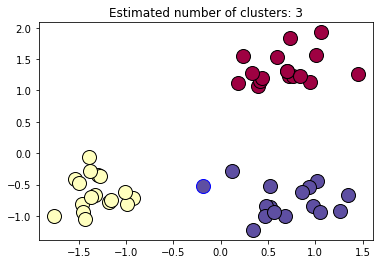

(array([0, 1, 2], dtype=int64), array([17, 17, 16], dtype=int64))

[]


In [65]:
# DB Scan

# Data creation
centers = [[1, 1], [-1, -1], [1, -1]]
data_features, labels_true, a = make_blobs(n_samples=50, centers=centers, cluster_std=0.3,random_state=5,shuffle=True , return_centers=True)  # generate sample blobs
X = StandardScaler().fit_transform(data_features)
X[:5]

# DBSCAN
db = DBSCAN(eps=0.7, min_samples=3, algorithm='ball_tree').fit(X)

labels = db.labels_  # similar to the model.fit() method, it gives the labels of the clustered data

print (labels)

# Setting Length of labels
len(set(labels))

1 if -1 in labels else 0

# Number of clusters in labels, ignoring noise if present.

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # the label -1 is considered as noise by the DBSCAN algorithm
n_noise_ = list(labels).count(-1)  # calculating the number of noises (-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Below code is for showcasing in diagram. Nothing related to model building

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)  # creating an array of true and false as the same size as db.labels

core_samples_mask[db.core_sample_indices_] = True  # setting the indices of the core regions to True
# Black  is used for noise.
unique_labels = set(labels)  # identifying all the unique labels/clusters

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]  # creating the list of colours, generating the colourmap



for k, col in zip(unique_labels, colors):
    
    
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)   # assigning class members for each class
    

    xy = X[class_member_mask & core_samples_mask] # creating the list of points for each class
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    

    xy = X[class_member_mask & ~core_samples_mask] # creating the list of noise points
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='b', markersize=14)
    
    

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Finding counts in each cluster
np.unique(labels, return_counts=True)

# Selecting only noises
noises = X[labels == 4]

print (noises)




In [66]:
data_rest=data2[["W","R", "AB"]]
data_features2=data2.drop(['W','R', 'AB'],axis=1)

In [67]:
data_features2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   H       30 non-null     float64
 1   2B      30 non-null     float64
 2   3B      30 non-null     float64
 3   BB      30 non-null     float64
 4   SO      30 non-null     float64
 5   SB      30 non-null     float64
 6   AB/HR   30 non-null     float64
dtypes: float64(7)
memory usage: 1.8 KB


In [68]:
# Removing skewness using Yeo-Johnson
# Removing data skewness
pt = PowerTransformer(method='yeo-johnson',standardize='True')
    
data_noskew= pt.fit_transform(data_features2.values)
data_noskewtab= pd.DataFrame(data_noskew)
data_noskewtab.columns = ['H','2B', '3B', 'BB', 'SO', 'SB', 'AB/HR']

print(data_noskewtab)

<IPython.core.display.Javascript object>

      H        2B        3B        BB        SO        SB     AB/HR
0   0.0  1.477685  1.033103 -1.610915 -2.569896  0.939708  0.821106
1   0.0  0.084269  1.203320 -0.502749  0.134913 -0.539693  0.091671
2   0.0  1.670782 -0.160270  1.128294 -0.901254  0.211956  0.608001
3   0.0 -0.848600 -0.360521 -1.181207 -0.189628 -0.642564  0.899531
4   0.0  0.792183  1.616444 -0.206771  0.085459  0.079629  0.399680
5   0.0  1.998506 -1.461062  1.708067 -0.957960  0.298238 -1.885245
6   0.0 -0.198558 -1.224911  1.461121 -0.228668 -0.910154 -1.391897
7   0.0 -1.556454 -1.110302 -0.904450  0.807174 -2.102897 -1.580377
8   0.0  0.141687  0.130611 -0.559191  0.594561  0.255285 -0.250684
9   0.0  1.099405  0.225256  0.204599 -0.986257 -0.489090  0.089573
10  0.0  0.199390  0.130611  0.634349 -0.170084  0.825451 -0.380068
11  0.0  0.141687 -0.462732  0.344014  1.434475  1.543609 -1.887470
12  0.0 -1.701159 -0.997802 -0.578074 -0.967396 -1.560880 -0.588379
13  0.0 -0.743057 -0.887277  0.204599  0.858050 

In [69]:
data_clean=pd.DataFrame(data_noskewtab)
print(data_clean)

<IPython.core.display.Javascript object>

      H        2B        3B        BB        SO        SB     AB/HR
0   0.0  1.477685  1.033103 -1.610915 -2.569896  0.939708  0.821106
1   0.0  0.084269  1.203320 -0.502749  0.134913 -0.539693  0.091671
2   0.0  1.670782 -0.160270  1.128294 -0.901254  0.211956  0.608001
3   0.0 -0.848600 -0.360521 -1.181207 -0.189628 -0.642564  0.899531
4   0.0  0.792183  1.616444 -0.206771  0.085459  0.079629  0.399680
5   0.0  1.998506 -1.461062  1.708067 -0.957960  0.298238 -1.885245
6   0.0 -0.198558 -1.224911  1.461121 -0.228668 -0.910154 -1.391897
7   0.0 -1.556454 -1.110302 -0.904450  0.807174 -2.102897 -1.580377
8   0.0  0.141687  0.130611 -0.559191  0.594561  0.255285 -0.250684
9   0.0  1.099405  0.225256  0.204599 -0.986257 -0.489090  0.089573
10  0.0  0.199390  0.130611  0.634349 -0.170084  0.825451 -0.380068
11  0.0  0.141687 -0.462732  0.344014  1.434475  1.543609 -1.887470
12  0.0 -1.701159 -0.997802 -0.578074 -0.967396 -1.560880 -0.588379
13  0.0 -0.743057 -0.887277  0.204599  0.858050 

In [70]:
data_final=pd.DataFrame()
data_final=pd.concat([data_clean,data_rest], axis=1)
print(data_final)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

      H        2B        3B        BB        SO        SB     AB/HR      W  \
0   0.0  1.477685  1.033103 -1.610915 -2.569896  0.939708  0.821106   95.0   
1   0.0  0.084269  1.203320 -0.502749  0.134913 -0.539693  0.091671   83.0   
2   0.0  1.670782 -0.160270  1.128294 -0.901254  0.211956  0.608001   81.0   
3   0.0 -0.848600 -0.360521 -1.181207 -0.189628 -0.642564  0.899531   76.0   
4   0.0  0.792183  1.616444 -0.206771  0.085459  0.079629  0.399680   74.0   
5   0.0  1.998506 -1.461062  1.708067 -0.957960  0.298238 -1.885245   93.0   
6   0.0 -0.198558 -1.224911  1.461121 -0.228668 -0.910154 -1.391897   87.0   
7   0.0 -1.556454 -1.110302 -0.904450  0.807174 -2.102897 -1.580377   81.0   
8   0.0  0.141687  0.130611 -0.559191  0.594561  0.255285 -0.250684   80.0   
9   0.0  1.099405  0.225256  0.204599 -0.986257 -0.489090  0.089573   78.0   
10  0.0  0.199390  0.130611  0.634349 -0.170084  0.825451 -0.380068   88.0   
11  0.0  0.141687 -0.462732  0.344014  1.434475  1.543609 -1.887

## Train Test Split

In [71]:
def split (data,target):
    data_reset_index = data.reset_index(drop=True)
# Data split
    global x
    global y
    global x_train
    global y_train
    global x_test
    global y_test
# Segregate Feature & Target Variables
    x = data_reset_index.drop(target, axis=1)
    y = data_reset_index[target]
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=3)
    
    print(x_train.info())
    ("\n")
    print(x_test.info())
    ("\n")
    print(y_train.shape)
    ("\n")
    print(y_test.shape)
    ("\n")

In [72]:
split(data=data_final,
      target="W")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 1 to 10
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   H       21 non-null     float64
 1   2B      21 non-null     float64
 2   3B      21 non-null     float64
 3   BB      21 non-null     float64
 4   SO      21 non-null     float64
 5   SB      21 non-null     float64
 6   AB/HR   21 non-null     float64
 7   R       21 non-null     float64
 8   AB      21 non-null     float64
dtypes: float64(9)
memory usage: 1.6 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 15 to 16
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   H       9 non-null      float64
 1   2B      9 non-null      float64
 2   3B      9 non-null      float64
 3   BB      9 non-null      float64
 4   SO      9 non-null      float64
 5   SB      9 non-null      float64
 6   AB/HR   9 non-null      float64
 7   R     

### Scaling the data

In [73]:
scale_1= StandardScaler()
scale_2= MinMaxScaler()
scale_3= RobustScaler()
model= LinearRegression()

In [74]:
pipe1 = Pipeline([
    ('Scale',scale_1),
    ('model',model),
])    
pipe2 = Pipeline([
    ('Scale',scale_2),
    ('model',model),
])
pipe3 = Pipeline([
    ('Scale',scale_3),
    ('model',model),  
    
])

In [75]:
# Create Function Name 
def pre_process(data, pipe):

# Pipe.fit, pipe.predict and accuracy
    
    pipe.fit(x_train,y_train)
    
    y_pred = pipe.predict(x_test)
    
    score = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
    
    return score

In [76]:
pre_process(data= data2,
           pipe= pipe1)

12.882328259266345

In [77]:
pre_process(data= data2,
           pipe= pipe2)

12.88232825926637

In [78]:
pre_process(data= data2,
           pipe= pipe3)

12.882328259266346

Since Robust scalar scores the most we should use Robust scalar for this data

In [79]:
scalar= RobustScaler()
scalar.fit(x_train)
x_trainsc =  scalar.transform(x_train)
x_testsc  =  scalar.transform(x_test)

RobustScaler()

### Pricipal Component Analysis (PCA)

In [80]:
pca = PCA(n_components = 0.5)
pca.fit(x_trainsc)
x_train_model = pca.transform(x_trainsc)
x_test_model = pca.transform(x_testsc)
ex_variance=np.var(x_train_model,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)

print("shape of x_train_pca", x_train_model.shape)
print('')    
print("Explained Variance Ratio for Training Dataset: \n", ex_variance_ratio)

print(" ")

ex_variance_1 = np.var(x_test_model , axis=0)
ex_variance_ratio_1 = ex_variance_1 / np.sum(ex_variance_1)
    
print("Explained Variance Ratio for Test Dataset: \n", ex_variance_ratio_1) 
print(" ")

<IPython.core.display.Javascript object>

PCA(n_components=0.5)

shape of x_train_pca (21, 2)

Explained Variance Ratio for Training Dataset: 
 [0.62491057 0.37508943]
 
Explained Variance Ratio for Test Dataset: 
 [0.61903245 0.38096755]
 


### Generating Polynomial Features

In [81]:
poly_features= PolynomialFeatures(degree=2)                       # second order polynomial regression

poly_features.fit(x_trainsc)                                       # TRAIN = fit_transform

x_train_poly = poly_features.transform(x_trainsc)                  # x_train_poly = poly_features.fit_transform(X_train)
x_test_poly =  poly_features.transform(x_testsc)                   # x_test_poly = poly_features.transform(x_test)

<IPython.core.display.Javascript object>

PolynomialFeatures()

## Model Building

### Linear Regression

In [82]:
lr = LinearRegression()
lr.fit(x_trainsc, y_train)


model = sm.OLS(y_train, x_trainsc).fit()


y_pred = model.predict(x_testsc)

print("Linear Regression Train Score: ", lr.score(x_trainsc , y_train))

print("Linear Regression Test Score: ", lr.score(x_testsc , y_test))

print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(y_test, y_pred),2))  
print('Mean Squared Error:', np.round(metrics.mean_squared_error(y_test, y_pred),2))  
print('Root Mean Squared Error:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print(model.summary())

LinearRegression()

Linear Regression Train Score:  0.6359039189854123
Linear Regression Test Score:  -0.19021647704434863
Mean Absolute Error: 75.04
Mean Squared Error: 5899.95
Root Mean Squared Error: 76.81
                                 OLS Regression Results                                
Dep. Variable:                      W   R-squared (uncentered):                   0.071
Model:                            OLS   Adj. R-squared (uncentered):             -0.501
Method:                 Least Squares   F-statistic:                             0.1241
Date:                Sat, 06 Aug 2022   Prob (F-statistic):                       0.997
Time:                        14:19:45   Log-Likelihood:                         -121.32
No. Observations:                  21   AIC:                                      258.6
Df Residuals:                      13   BIC:                                      267.0
Df Model:                           8                                                  
Covariance Type:   

In [83]:
rfe = RFE(lr, n_features_to_select=6)             
rfe = rfe.fit(x, y)

r2 = sklearn.metrics.r2_score(y_test, y_pred)

scores = cross_val_score(lr, x, y, scoring='r2', cv=5)
scores   

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lr, x, y, scoring='r2', cv=folds)
scores  

scores = cross_val_score(lr, x, y, scoring='neg_mean_squared_error', cv=5)
scores

<IPython.core.display.Javascript object>

array([-1.06597868, -0.60977753, -1.33396807, -1.21994347, -0.42659534])

array([-0.4710509 , -0.64944041, -0.89094231, -0.29396338,  0.05659905])

array([-129.23844404,  -23.43120633, -340.50000878, -196.40333193,
       -133.94145176])

In [84]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(x_trainsc, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
grid_result= model_cv.fit(x_trainsc, y_train)   
print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

LinearRegression()

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 13 candidates, totalling 65 fits
Best Score:  -0.06627841565538029
Best Params:  {'n_features_to_select': 4}


In [85]:
# final model
n_features_optimal = 4
lm = LinearRegression()
lm.fit(x_trainsc, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(x_trainsc, y_train)

# predict prices of X_test
y_pred = lm.predict(x_testsc)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

print("Linear Regression Train Score: ", lm.score(x_trainsc , y_train))

print("Linear Regression Test Score: ", lm.score(x_testsc , y_test))

print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(y_test, y_pred),2))  
print('Mean Squared Error:', np.round(metrics.mean_squared_error(y_test, y_pred),2))  
print('Root Mean Squared Error:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

LinearRegression()

<IPython.core.display.Javascript object>

-0.19021647704434863
Linear Regression Train Score:  0.6359039189854123
Linear Regression Test Score:  -0.19021647704434863
Mean Absolute Error: 11.28
Mean Squared Error: 165.95
Root Mean Squared Error: 12.88


### Lasso Regression Model

In [86]:
lasso_001 = Lasso()

lasso_001.fit(x_trainsc , y_train)


y_pred_lasso = lasso_001.predict(x_testsc)

print("LASSO Regression Train Score: ", lasso_001.score(x_trainsc , y_train))

print("LASSO Regression Test Score: ", lasso_001.score(x_testsc , y_test))


print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(y_test, y_pred_lasso),2))  
print('Mean Squared Error:', np.round(metrics.mean_squared_error(y_test, y_pred_lasso),2))  
print('Root Mean Squared Error:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)),2))

y_pred = lasso_001.predict(x_testsc)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

coeff_used_002 = np.sum(lasso_001.coef_ != 0)

print("Coefficient used: ",coeff_used_002)

Lasso()

LASSO Regression Train Score:  0.47339440380934406
LASSO Regression Test Score:  0.22294925935645782
Mean Absolute Error: 8.68
Mean Squared Error: 108.35
Root Mean Squared Error: 10.41


<IPython.core.display.Javascript object>

R2=  0.22294925935645782
Coefficient used:  6


In [87]:
rfe = RFE(lasso_001, n_features_to_select=6)             
rfe = rfe.fit(x, y)

r2 = sklearn.metrics.r2_score(y_test, y_pred)

scores = cross_val_score(lasso_001, x, y, scoring='r2', cv=5)
scores   

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lasso_001, x, y, scoring='r2', cv=folds)
scores  

scores = cross_val_score(lasso_001, x, y, scoring='neg_mean_squared_error', cv=5)
scores

<IPython.core.display.Javascript object>

array([-0.56350414,  0.45246418, -0.78349858, -0.13963546, -0.04220564])

array([ 0.079266  , -0.04731658, -0.26000794, -0.14585123,  0.24758258])

array([ -97.80587022,   -7.96968811, -260.19262624, -100.82608151,
        -97.85152941])

In [88]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'alpha': range(0, 100), 'random_state':range(1, 20,1), 'selection': ['cyclic', 'random'] }]

# step-3: perform grid search
# 3.1 specify model
lasso_001 = Lasso()
lasso_001.fit(x_trainsc , y_train)
rfe = RFE(lasso_001)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = lasso_001, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
grid_result= model_cv.fit(x_trainsc, y_train)   
print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

Lasso()

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 3800 candidates, totalling 19000 fits
Best Score:  -7.647127130011069
Best Params:  {'alpha': 3, 'random_state': 3, 'selection': 'random'}


In [89]:
lasso_002 = Lasso(alpha = 3 , selection='random', random_state=3)

lasso_002.fit(x_trainsc , y_train)


y_pred_lasso = lasso_002.predict(x_testsc)

print("LASSO Regression Train Score: ", lasso_002.score(x_trainsc , y_train))

print("LASSO Regression Test Score: ", lasso_002.score(x_testsc , y_test))

y_pred = lasso_002.predict(x_testsc)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(y_test, y_pred_lasso),2))  
print('Mean Squared Error:', np.round(metrics.mean_squared_error(y_test, y_pred_lasso),2))  
print('Root Mean Squared Error:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)),2))



coeff_used_002 = np.sum(lasso_002.coef_ != 0)

print("Coefficient used: ",coeff_used_002)


Lasso(alpha=3, random_state=3, selection='random')

LASSO Regression Train Score:  0.10491767882631364
LASSO Regression Test Score:  -0.012425197370820484


<IPython.core.display.Javascript object>

R2=  -0.012425197370820484
Mean Absolute Error: 10.27
Mean Squared Error: 141.16
Root Mean Squared Error: 11.88
Coefficient used:  1


### Using Polynomial Features

In [90]:
lasso_003 = Lasso()

lasso_003.fit(x_train_poly , y_train)


y_pred_lasso = lasso_003.predict(x_test_poly)

print("LASSO Regression Train Score: ", lasso_003.score(x_train_poly , y_train))

print("LASSO Regression Test Score: ", lasso_003.score(x_test_poly , y_test))


print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(y_test, y_pred_lasso),2))  
print('Mean Squared Error:', np.round(metrics.mean_squared_error(y_test, y_pred_lasso),2))  
print('Root Mean Squared Error:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)),2))
y_pred = lasso_003.predict(x_test_poly)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)
coeff_used_002 = np.sum(lasso_003.coef_ != 0)

print("Coefficient used: ",coeff_used_002)

Lasso()

LASSO Regression Train Score:  0.6964212521389852
LASSO Regression Test Score:  -0.1039271394654353
Mean Absolute Error: 9.88
Mean Squared Error: 153.92
Root Mean Squared Error: 12.41


<IPython.core.display.Javascript object>

R2=  -0.1039271394654353
Coefficient used:  7


In [91]:
rfe = RFE(lasso_003, n_features_to_select=6)             
rfe = rfe.fit(x, y)

r2 = sklearn.metrics.r2_score(y_test, y_pred)

scores = cross_val_score(lasso_003, x, y, scoring='r2', cv=5)
scores   

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lasso_003, x, y, scoring='r2', cv=folds)
scores  

scores = cross_val_score(lasso_003, x, y, scoring='neg_mean_squared_error', cv=5)
scores

<IPython.core.display.Javascript object>

array([-0.56350414,  0.45246418, -0.78349858, -0.13963546, -0.04220564])

array([ 0.079266  , -0.04731658, -0.26000794, -0.14585123,  0.24758258])

array([ -97.80587022,   -7.96968811, -260.19262624, -100.82608151,
        -97.85152941])

In [92]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'alpha': range(0, 100), 'random_state':range(1, 20,1), 'selection': ['cyclic', 'random']}]

# step-3: perform grid search
# 3.1 specify model
lasso_003 = Lasso()
lasso_003.fit(x_train_poly , y_train)
rfe = RFE(lasso_003)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = lasso_001, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
grid_result= model_cv.fit(x_train_poly, y_train)   
print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

Lasso()

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 3800 candidates, totalling 19000 fits
Best Score:  -6.426328012231162
Best Params:  {'alpha': 2, 'random_state': 14, 'selection': 'random'}


In [93]:
lasso_004 = Lasso(alpha=2, random_state=14, selection='random')

lasso_004.fit(x_train_poly , y_train)


y_pred_lasso = lasso_004.predict(x_test_poly)

print("LASSO Regression Train Score: ", lasso_004.score(x_train_poly , y_train))

print("LASSO Regression Test Score: ", lasso_004.score(x_test_poly , y_test))


print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(y_test, y_pred_lasso),2))  
print('Mean Squared Error:', np.round(metrics.mean_squared_error(y_test, y_pred_lasso),2))  
print('Root Mean Squared Error:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)),2))
y_pred = lasso_004.predict(x_test_poly)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)
coeff_used_002 = np.sum(lasso_004.coef_ != 0)

print("Coefficient used: ",coeff_used_002)

Lasso(alpha=2, random_state=14, selection='random')

LASSO Regression Train Score:  0.5327587624611407
LASSO Regression Test Score:  -0.1614822418564359
Mean Absolute Error: 10.33
Mean Squared Error: 161.95
Root Mean Squared Error: 12.73


<IPython.core.display.Javascript object>

R2=  -0.1614822418564359
Coefficient used:  4


### Ridge Regression Model

In [94]:
rr1 = Ridge()                                                   # alpha = regularization hyper-parameter

rr1.fit(x_trainsc, y_train)


y_pred_rr = rr1.predict(x_testsc)

print("Ridge Regression Train Score: ", rr1.score(x_trainsc, y_train))
print("Ridge Regression Test Score: ", rr1.score(x_testsc, y_test))
print("\n")
print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(y_test, y_pred_rr),2))  
print('Mean Squared Error:', np.round(metrics.mean_squared_error(y_test, y_pred_rr),2))
print('Root Mean Squared Error:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rr)),2))
y_pred = rr1.predict(x_testsc)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

coeff_used_001 = np.sum(rr1.coef_ != 0)

print("Coefficient used:","\n",coeff_used_001)

Ridge()

Ridge Regression Train Score:  0.623809744808417
Ridge Regression Test Score:  -0.045029584953102164


Mean Absolute Error: 10.56
Mean Squared Error: 145.71
Root Mean Squared Error: 12.07


<IPython.core.display.Javascript object>

R2=  -0.045029584953102164
Coefficient used: 
 8


In [95]:
rfe = RFE(rr1, n_features_to_select=6)             
rfe = rfe.fit(x_trainsc, y_train)

r2 = sklearn.metrics.r2_score(y_test, y_pred)

scores = cross_val_score(rr1, x, y, scoring='r2', cv=5)
scores   

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(rr1, x, y, scoring='r2', cv=folds)
scores  

scores = cross_val_score(rr1, x, y, scoring='neg_mean_squared_error', cv=5)
scores

<IPython.core.display.Javascript object>

array([-0.97065014, -0.37102413, -1.13072811, -0.88947095, -0.31658898])

array([-0.35214085, -0.50874137, -0.78455685, -0.24963195,  0.1369406 ])

array([-123.27511451,  -19.95601796, -310.84955656, -167.16569381,
       -123.61307652])

In [96]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'alpha': list(range(0, 10)),'normalize':[True, False],
                 'random_state':list(range(0, 10)), 'tol': list(range(-100, 100,10)), 
                 'solver': ['auto', 'svd','cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}]


# step-3: perform grid search

# 3.1 specify model
rr1 = Ridge()
rr1.fit(x_trainsc, y_train)

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rr1,
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds,
                        verbose=1,
                        return_train_score=True)      

# fit the model
grid_result= model_cv.fit(x_trainsc, y_train)   
print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)        

Ridge()

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 32000 candidates, totalling 160000 fits
Best Score:  -6.294993974447886
Best Params:  {'alpha': 0, 'normalize': True, 'random_state': 3, 'solver': 'saga', 'tol': 10}


In [98]:
rr2 = Ridge(alpha = 0, normalize= True, random_state= 3, solver= 'saga', tol= 10)                                                   # alpha = regularization hyper-parameter

rr2.fit(x_trainsc, y_train)


y_pred_rr = rr2.predict(x_testsc)

print("Ridge Regression Train Score: ", rr2.score(x_trainsc, y_train))
print("Ridge Regression Test Score: ", rr2.score(x_testsc, y_test))
print("\n")
print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(y_test, y_pred_rr),2))  
print('Mean Squared Error:', np.round(metrics.mean_squared_error(y_test, y_pred_rr),2))
print('Root Mean Squared Error:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rr)),2))

y_pred = rr2.predict(x_testsc)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

coeff_used_001 = np.sum(rr2.coef_ != 0)

print("Coefficient used: ",coeff_used_001)

Ridge(alpha=0, normalize=True, random_state=3, solver='saga', tol=10)

Ridge Regression Train Score:  0.4941542827985108
Ridge Regression Test Score:  0.11892731184129035


Mean Absolute Error: 9.62
Mean Squared Error: 122.85
Root Mean Squared Error: 11.08


<IPython.core.display.Javascript object>

R2=  0.11892731184129035
Coefficient used:  8


### Using Polynomial Features

In [99]:
rr3 = Ridge(alpha = 0.5)                                                   # alpha = regularization hyper-parameter

rr3.fit(x_train_poly, y_train)


y_pred_rr = rr3.predict(x_test_poly)

print("Ridge Regression Train Score: ", rr3.score(x_train_poly, y_train))
print("Ridge Regression Test Score: ", rr3.score(x_test_poly, y_test))
print("\n")
print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(y_test, y_pred_rr),2))  
print('Mean Squared Error:', np.round(metrics.mean_squared_error(y_test, y_pred_rr),2))
print('Root Mean Squared Error:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rr)),2))

y_pred = rr3.predict(x_test_poly)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

coeff_used_001 = np.sum(rr3.coef_ != 0)

print("Coefficient used: ",coeff_used_001)

Ridge(alpha=0.5)

Ridge Regression Train Score:  0.9911372765577123
Ridge Regression Test Score:  -0.08068705128864329


Mean Absolute Error: 10.38
Mean Squared Error: 150.68
Root Mean Squared Error: 12.28


<IPython.core.display.Javascript object>

R2=  -0.08068705128864329
Coefficient used:  44


In [100]:
rfe = RFE(rr3, n_features_to_select=6)             
rfe = rfe.fit(x_train_poly, y_train)

r2 = sklearn.metrics.r2_score(y_test, y_pred)

scores = cross_val_score(rr3, x, y, scoring='r2', cv=5)
scores   

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(rr3, x, y, scoring='r2', cv=folds)
scores  

scores = cross_val_score(rr3, x, y, scoring='neg_mean_squared_error', cv=5)
scores

<IPython.core.display.Javascript object>

array([-1.01651905, -0.47384277, -1.21358824, -1.02359339, -0.36522037])

array([-0.40699638, -0.57360356, -0.83365592, -0.26884588,  0.10239528])

array([-126.14446962,  -21.45260028, -322.93792884, -179.03180432,
       -128.17902344])

In [101]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'alpha': list(range(0, 10)),'normalize':[True, False],
                 'random_state':list(range(0, 10)), 'tol': list(range(-100, 100,10)), 
                 'solver': ['auto', 'svd','cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}]


# step-3: perform grid search

# 3.1 specify model
rr = Ridge()
rr.fit(x_train_poly, y_train)

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rr,
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds,
                        verbose=1,
                        return_train_score=True)      

# fit the model
grid_result= model_cv.fit(x_train_poly, y_train)   
print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)        

Ridge()

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 32000 candidates, totalling 160000 fits
Best Score:  -6.686926482491335
Best Params:  {'alpha': 0, 'normalize': False, 'random_state': 2, 'solver': 'sag', 'tol': 10}


In [102]:
rr4 = Ridge(alpha = 0, normalize= False, random_state= 2, solver= 'sag', tol= 10)                                                   # alpha = regularization hyper-parameter

rr4.fit(x_train_poly, y_train)


y_pred_rr = rr4.predict(x_test_poly)

print("Ridge Regression Train Score: ", rr4.score(x_train_poly, y_train))
print("Ridge Regression Test Score: ", rr4.score(x_test_poly, y_test))
print("\n")
print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(y_test, y_pred_rr),2))  
print('Mean Squared Error:', np.round(metrics.mean_squared_error(y_test, y_pred_rr),2))
print('Root Mean Squared Error:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rr)),2))

y_pred = rr4.predict(x_test_poly)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

coeff_used_001 = np.sum(rr4.coef_ != 0)

print("Coefficient used: ",coeff_used_001)

Ridge(alpha=0, random_state=2, solver='sag', tol=10)

Ridge Regression Train Score:  0.07172218504286665
Ridge Regression Test Score:  0.060170573707076014


Mean Absolute Error: 9.46
Mean Squared Error: 131.04
Root Mean Squared Error: 11.45


<IPython.core.display.Javascript object>

R2=  0.060170573707076014
Coefficient used:  44


### Elastic Net Model

In [103]:
lm_elastic1 = ElasticNet()

lm_elastic1.fit(x_trainsc, y_train)



y_pred_elastic = lm_elastic1.predict(x_testsc)


print("Elastic Net Train Score: ", lm_elastic1.score(x_trainsc , y_train))

print("Elastic Net Test Score: ", lm_elastic1.score(x_testsc , y_test))


print('Mean Absolute Error: \n', np.round(metrics.mean_absolute_error(y_test, y_pred_elastic),2)) 

print(" ")

print('Mean Squared Error: \n', np.round(metrics.mean_squared_error(y_test, y_pred_elastic),2))

print(" ")

print('Root Mean Squared Error: \n', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_elastic)),2))
print(" ")

y_pred = lm_elastic1.predict(x_testsc)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

coeff_used_003 = np.sum(lm_elastic1.coef_ != 0)

print("Coefficient used: ",coeff_used_003)

ElasticNet()

Elastic Net Train Score:  0.4025519735310158
Elastic Net Test Score:  0.214043492195077
Mean Absolute Error: 
 8.1
 
Mean Squared Error: 
 109.59
 
Root Mean Squared Error: 
 10.47
 


<IPython.core.display.Javascript object>

R2=  0.214043492195077
Coefficient used:  7


In [104]:
rfe = RFE(lm_elastic1, n_features_to_select=6)             
rfe = rfe.fit(x_trainsc, y_train)

r2 = sklearn.metrics.r2_score(y_test, y_pred)

scores = cross_val_score(lm_elastic1, x, y, scoring='r2', cv=5)
scores   

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm_elastic1, x, y, scoring='r2', cv=folds)
scores  

scores = cross_val_score(lm_elastic1, x, y, scoring='neg_mean_squared_error', cv=5)
scores

<IPython.core.display.Javascript object>

array([-0.2599518 ,  0.31129434, -0.77919505, -0.22933178, -0.05629956])

array([ 0.25959545,  0.05945728, -0.2843779 , -0.13679014,  0.27182974])

array([ -78.81698507,  -10.02449347, -259.56478863, -108.76171459,
        -99.17479228])

In [105]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'alpha': list(range(0, 10)),'fit_intercept': [True, False],
                 'normalize':[True, False],
                 'random_state':list(range(0, 10)), 'tol': list(range(-100, 100, 10)), 
                 'selection': ['cyclic', 'random']}]


# step-3: perform grid search
# 3.1 specify model
lm_elastic = ElasticNet()

lm_elastic.fit(x_trainsc, y_train)
            

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = lm_elastic,
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds,
                        verbose=1,
                        return_train_score=True)
    

# fit the model
grid_result= model_cv.fit(x_trainsc, y_train)   
print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

ElasticNet()

<IPython.core.display.Javascript object>

Fitting 3 folds for each of 16000 candidates, totalling 48000 fits
Best Score:  -6.90765911884089
Best Params:  {'alpha': 0, 'fit_intercept': True, 'normalize': True, 'random_state': 9, 'selection': 'random', 'tol': 10}


In [106]:
lm_elastic2 = ElasticNet(alpha= 0, fit_intercept= True, normalize= True, random_state= 9, selection='random', tol= 50)

lm_elastic2.fit(x_trainsc, y_train)



y_pred_elastic = lm_elastic2.predict(x_testsc)


print("Elastic Net Train Score: ", lm_elastic2.score(x_trainsc , y_train))

print("Elastic Net Test Score: ", lm_elastic2.score(x_testsc , y_test))


print('Mean Absolute Error: \n', np.round(metrics.mean_absolute_error(y_test, y_pred_elastic),2)) 

print(" ")

print('Mean Squared Error: \n', np.round(metrics.mean_squared_error(y_test, y_pred_elastic),2))

print(" ")

print('Root Mean Squared Error: \n', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_elastic)),2))
print(" ")

y_pred = lm_elastic2.predict(x_testsc)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

coeff_used_003 = np.sum(lm_elastic2.coef_ != 0)

print("Coefficient used: ",coeff_used_003)

ElasticNet(alpha=0, normalize=True, random_state=9, selection='random', tol=50)

Elastic Net Train Score:  0.3857498447890563
Elastic Net Test Score:  0.055342407420813755
Mean Absolute Error: 
 9.83
 
Mean Squared Error: 
 131.72
 
Root Mean Squared Error: 
 11.48
 


<IPython.core.display.Javascript object>

R2=  0.055342407420813755
Coefficient used:  5


### Using Polynomial Features

In [108]:
lm_elastic3 = ElasticNet()

lm_elastic3.fit(x_train_poly, y_train)



y_pred_elastic = lm_elastic3.predict(x_test_poly)


print("Elastic Net Train Score: ", lm_elastic3.score(x_train_poly , y_train))

print("Elastic Net Test Score: ", lm_elastic3.score(x_test_poly , y_test))


print('Mean Absolute Error: \n', np.round(metrics.mean_absolute_error(y_test, y_pred_elastic),2)) 

print(" ")

print('Mean Squared Error: \n', np.round(metrics.mean_squared_error(y_test, y_pred_elastic),2))

print(" ")

print('Root Mean Squared Error: \n', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_elastic)),2))

print(" ")

y_pred = lm_elastic3.predict(x_test_poly)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

coeff_used_003 = np.sum(lm_elastic3.coef_ != 0)

print("Coefficient used: ",coeff_used_003)

ElasticNet()

Elastic Net Train Score:  0.7058768944221718
Elastic Net Test Score:  -0.04073889306390299
Mean Absolute Error: 
 9.45
 
Mean Squared Error: 
 145.11
 
Root Mean Squared Error: 
 12.05
 


<IPython.core.display.Javascript object>

R2=  -0.04073889306390299
Coefficient used:  15


In [109]:
rfe = RFE(lm_elastic3, n_features_to_select=6)             
rfe = rfe.fit(x_train_poly, y_train)

r2 = sklearn.metrics.r2_score(y_test, y_pred)

scores = cross_val_score(lm_elastic3, x, y, scoring='r2', cv=5)
scores   

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm_elastic, x, y, scoring='r2', cv=folds)
scores  

scores = cross_val_score(lm_elastic, x, y, scoring='neg_mean_squared_error', cv=5)
scores

<IPython.core.display.Javascript object>

array([-0.2599518 ,  0.31129434, -0.77919505, -0.22933178, -0.05629956])

array([ 0.25959545,  0.05945728, -0.2843779 , -0.13679014,  0.27182974])

array([ -78.81698507,  -10.02449347, -259.56478863, -108.76171459,
        -99.17479228])

In [110]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'alpha': list(range(0, 1)),'fit_intercept': [True, False],
                 'normalize':[True, False],
                 'random_state':list(range(0, 10)), 'tol': list(range(-100, 100, 50)), 
                 'selection': ['cyclic', 'random']}]


# step-3: perform grid search
# 3.1 specify model
lm_elastic = ElasticNet()

lm_elastic.fit(x_train_poly, y_train)
            

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = lm_elastic,
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds,
                        verbose=1,
                        return_train_score=True)
    

# fit the model
grid_result= model_cv.fit(x_train_poly, y_train)   
print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

ElasticNet()

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Best Score:  -7.573309570114661
Best Params:  {'alpha': 0, 'fit_intercept': True, 'normalize': False, 'random_state': 9, 'selection': 'random', 'tol': 50}


In [111]:
lm_elastic4 = ElasticNet(alpha= 0, fit_intercept= True, normalize= True, random_state= 4, selection='random', tol= 50)

lm_elastic4.fit(x_train_poly, y_train)



y_pred_elastic = lm_elastic4.predict(x_test_poly)


print("Elastic Net Train Score: ", lm_elastic.score(x_train_poly , y_train))

print("Elastic Net Test Score: ", lm_elastic.score(x_test_poly , y_test))


print('Mean Absolute Error: \n', np.round(metrics.mean_absolute_error(y_test, y_pred_elastic),2)) 

print(" ")

print('Mean Squared Error: \n', np.round(metrics.mean_squared_error(y_test, y_pred_elastic),2))

print(" ")

print('Root Mean Squared Error: \n', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_elastic)),2))

print(" ")

y_pred = lm_elastic4.predict(x_test_poly)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

coeff_used_003 = np.sum(lm_elastic4.coef_ != 0)

print("Coefficient used: ",coeff_used_003)


ElasticNet(alpha=0, normalize=True, random_state=4, selection='random', tol=50)

Elastic Net Train Score:  0.7058768944221718
Elastic Net Test Score:  -0.04073889306390299
Mean Absolute Error: 
 12.32
 
Mean Squared Error: 
 227.95
 
Root Mean Squared Error: 
 15.1
 


<IPython.core.display.Javascript object>

R2=  -0.634877880964025
Coefficient used:  30


### Support Vector Regression Model

In [112]:
svm1 = SVR()
svm1.fit(x_trainsc, y_train)



y_pred_svm = svm1.predict(x_testsc)


print("Support Vector Model Train Score: ", svm1.score(x_trainsc , y_train))

print("Support Vector Model Test Score: ", svm1.score(x_testsc , y_test))


print('Mean Absolute Error: \n', np.round(metrics.mean_absolute_error(y_test, y_pred_svm),2)) 

print(" ")

print('Mean Squared Error: \n', np.round(metrics.mean_squared_error(y_test, y_pred_svm),2))

print(" ")

print('Root Mean Squared Error: \n', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_svm)),2))

print(" ")

y_pred = svm1.predict(x_testsc)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

SVR()

Support Vector Model Train Score:  0.22938390366646533
Support Vector Model Test Score:  -0.004021057601211853
Mean Absolute Error: 
 10.18
 
Mean Squared Error: 
 139.99
 
Root Mean Squared Error: 
 11.83
 


<IPython.core.display.Javascript object>

R2=  -0.004021057601211853


In [113]:
# create dataset for CV
X, y = make_classification(n_samples=100, n_features=15, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = SVR()
# evaluate model
scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: ' , scores)


Accuracy:  [0.64477326 0.73517177 0.56346024 0.76713943 0.74717043 0.53506326
 0.69310177 0.60927821 0.56769742 0.75403395]


In [114]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune

hyper_params = [{'kernel':['linear','poly','rbf','sigmoid'],
                'degree':[1,2,3,5,10],
                'gamma': ['scale','auto'],
                'tol':[1,2,3,5,10],
                'C':[0,0.1,0.2,0.5,1],
                'max_iter': [-1,1,3,5,7,10]}]



# step-3: perform grid search
# 3.1 specify model
svm = SVR()

svm.fit(x_trainsc, y_train)
            

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = svm,
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds,
                        verbose=1,
                        return_train_score=True)
    

# fit the model
grid_result= model_cv.fit(x_trainsc, y_train)   
print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

SVR()

<IPython.core.display.Javascript object>

Fitting 3 folds for each of 6000 candidates, totalling 18000 fits
Best Score:  -6.979615102318199
Best Params:  {'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 5, 'tol': 10}


In [115]:
svm2 = SVR(C= 0.5, degree= 1, gamma= 'scale', kernel= 'linear', max_iter= -1, tol= 10)
svm2.fit(x_trainsc, y_train)



y_pred_svm = svm2.predict(x_testsc)


print("Support Vector Model Train Score: ", svm2.score(x_trainsc , y_train))

print("Support Vector Model Test Score: ", svm2.score(x_testsc , y_test))


print('Mean Absolute Error: \n', np.round(metrics.mean_absolute_error(y_test, y_pred_svm),2)) 

print(" ")

print('Mean Squared Error: \n', np.round(metrics.mean_squared_error(y_test, y_pred_svm),2))

print(" ")

print('Root Mean Squared Error: \n', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_svm)),2))

print(" ")

y_pred = svm2.predict(x_testsc)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

SVR(C=0.5, degree=1, kernel='linear', tol=10)

Support Vector Model Train Score:  0.36677092012826673
Support Vector Model Test Score:  0.015468677939176279
Mean Absolute Error: 
 8.87
 
Mean Squared Error: 
 137.28
 
Root Mean Squared Error: 
 11.72
 


<IPython.core.display.Javascript object>

R2=  0.015468677939176279


### Using Polynomial Features

In [116]:
svm3 = SVR()
svm3.fit(x_train_poly, y_train)



y_pred_svm = svm3.predict(x_test_poly)


print("Support Vector Model Train Score: ", svm3.score(x_train_poly , y_train))

print("Support Vector Model Test Score: ", svm3.score(x_test_poly , y_test))


print('Mean Absolute Error: \n', np.round(metrics.mean_absolute_error(y_test, y_pred_svm),2)) 

print(" ")

print('Mean Squared Error: \n', np.round(metrics.mean_squared_error(y_test, y_pred_svm),2))

print(" ")

print('Root Mean Squared Error: \n', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_svm)),2))
print(" ")

y_pred = svm3.predict(x_test_poly)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

SVR()

Support Vector Model Train Score:  0.13789085583355754
Support Vector Model Test Score:  -0.02169324727298072
Mean Absolute Error: 
 10.28
 
Mean Squared Error: 
 142.46
 
Root Mean Squared Error: 
 11.94
 


<IPython.core.display.Javascript object>

R2=  -0.02169324727298072


In [117]:
# create dataset for CV
X, y = make_classification(n_samples=100, n_features=15,random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = SVR()
# evaluate model
scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: ' , scores)


Accuracy:  [0.64477326 0.73517177 0.56346024 0.76713943 0.74717043 0.53506326
 0.69310177 0.60927821 0.56769742 0.75403395]


In [118]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune

hyper_params = [{'kernel':['linear','poly','rbf','sigmoid'],
                'degree':[1,2,3,5,10],
                'gamma': ['scale','auto'],
                'tol':[1,2,3,5,10],
                'C':[0,0.1,0.2,0.5,1],
                'max_iter': [-1,1,3,5,7,10]}]



# step-3: perform grid search
# 3.1 specify model
svm = SVR()

svm.fit(x_train_poly, y_train)
            

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = svm,
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds,
                        verbose=1,
                        return_train_score=True)
    

# fit the model
grid_result= model_cv.fit(x_train_poly, y_train)   
print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

SVR()

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 6000 candidates, totalling 30000 fits
Best Score:  -5.888188003159023
Best Params:  {'C': 0.2, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'tol': 10}


In [119]:
svm4 = SVR(C=0.5, degree=2, gamma='auto', kernel='poly', max_iter=-1, tol=10)
svm4.fit(x_train_poly, y_train)



y_pred_svm = svm4.predict(x_test_poly)


print("Support Vector Model Train Score: ", svm4.score(x_train_poly , y_train))

print("Support Vector Model Test Score: ", svm4.score(x_test_poly , y_test))


print('Mean Absolute Error: \n', np.round(metrics.mean_absolute_error(y_test, y_pred_svm),2)) 

print(" ")

print('Mean Squared Error: \n', np.round(metrics.mean_squared_error(y_test, y_pred_svm),2))

print(" ")

print('Root Mean Squared Error: \n', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_svm)),2))

print(" ")

y_pred = svm4.predict(x_test_poly)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

SVR(C=0.5, degree=2, gamma='auto', kernel='poly', tol=10)

Support Vector Model Train Score:  0.26295599718774176
Support Vector Model Test Score:  -0.009058011234508667
Mean Absolute Error: 
 10.16
 
Mean Squared Error: 
 140.7
 
Root Mean Squared Error: 
 11.86
 


<IPython.core.display.Javascript object>

R2=  -0.009058011234508667


### Decision Tree Regressor

In [120]:
dTree1 = DecisionTreeRegressor(random_state=1)
dTree1.fit(x_trainsc, y_train)
y_predict = dTree1.predict(x_testsc)

print("Decision Tree Model Train Score: ", dTree1.score(x_trainsc , y_train))

print("Decision Tree Model Test Score: ", dTree1.score(x_testsc , y_test))


print('Mean Absolute Error: \n', np.round(metrics.mean_absolute_error(y_test, y_predict),2)) 

print(" ")

print('Mean Squared Error: \n', np.round(metrics.mean_squared_error(y_test, y_predict),2))

print(" ")

print('Root Mean Squared Error: \n', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_predict)),2))

print(" ")

y_pred = dTree1.predict(x_testsc)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

DecisionTreeRegressor(random_state=1)

Decision Tree Model Train Score:  1.0
Decision Tree Model Test Score:  -0.2694350982822735
Mean Absolute Error: 
 12.11
 
Mean Squared Error: 
 177.0
 
Root Mean Squared Error: 
 13.3
 


<IPython.core.display.Javascript object>

R2=  -0.2694350982822735


DecisionTreeRegressor(max_depth=1)

DecisionTreeRegressor(max_depth=2)

DecisionTreeRegressor(max_depth=3)

DecisionTreeRegressor(max_depth=4)

DecisionTreeRegressor(max_depth=5)

DecisionTreeRegressor(max_depth=6)

DecisionTreeRegressor(max_depth=7)

DecisionTreeRegressor(max_depth=8)

DecisionTreeRegressor(max_depth=9)

DecisionTreeRegressor(max_depth=1)

DecisionTreeRegressor(max_depth=2)

DecisionTreeRegressor(max_depth=3)

DecisionTreeRegressor(max_depth=4)

DecisionTreeRegressor(max_depth=5)

DecisionTreeRegressor(max_depth=6)

DecisionTreeRegressor(max_depth=7)

DecisionTreeRegressor(max_depth=8)

DecisionTreeRegressor(max_depth=9)

Text(0.5, 0, 'Tree depth')

Text(7.5, 1.17, 'optimum = 7')

Text(0, 0.5, 'Mean squared error')

Text(0.5, 1.0, 'Hyperparameter Tuning')

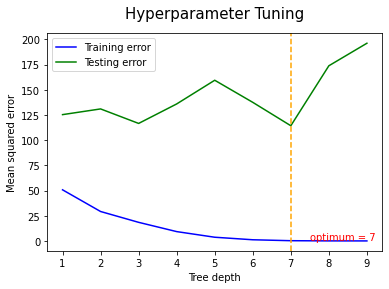

In [121]:
# Plotting
max_depths = range(1, 10)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(x_trainsc, y_train)
    training_error.append(mse(y_train, model_1.predict(x_trainsc)))
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(x_trainsc, y_train)
    testing_error.append(mse(y_test, model_2.predict(x_testsc)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.axvline(x=7, color='orange', linestyle='--')
plt.annotate('optimum = 7', xy=(7.5, 1.17), color='red')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()

In [122]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune

hyper_params = [{'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
                'splitter':['best','random'],
                'max_depth': [1,3,5,7,10],
                'max_features':['auto','sqrt','log2'],
                'random_state':[0,1,3,5,7,10],
                'ccp_alpha': [0,0.1,0.5,0.7,1]}]



# step-3: perform grid search
# 3.1 specify model
dTree = DecisionTreeRegressor()

dTree.fit(x_trainsc, y_train)
            

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = dTree,
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds,
                        verbose=1,
                        return_train_score=True)
    

# fit the model
grid_result= model_cv.fit(x_trainsc, y_train)   
print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

DecisionTreeRegressor()

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits
Best Score:  0.29845191327069615
Best Params:  {'ccp_alpha': 0, 'criterion': 'poisson', 'max_depth': 10, 'max_features': 'auto', 'random_state': 5, 'splitter': 'best'}


In [123]:
dTree2 = DecisionTreeRegressor(ccp_alpha=0, criterion='poisson', max_depth=10, max_features='auto', random_state=5, splitter='best')
dTree2.fit(x_trainsc, y_train)
y_predict = dTree2.predict(x_testsc)

print("Decision Tree Model Train Score: ", dTree2.score(x_trainsc , y_train))

print("Decision Tree Model Test Score: ", dTree2.score(x_testsc , y_test))


print('Mean Absolute Error: \n', np.round(metrics.mean_absolute_error(y_test, y_predict),2)) 

print(" ")

print('Mean Squared Error: \n', np.round(metrics.mean_squared_error(y_test, y_predict),2))

print(" ")

print('Root Mean Squared Error: \n', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_predict)),2))

print(" ")

y_pred = dTree2.predict(x_testsc)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

DecisionTreeRegressor(ccp_alpha=0, criterion='poisson', max_depth=10,
                      max_features='auto', random_state=5)

Decision Tree Model Train Score:  0.7563922950198739
Decision Tree Model Test Score:  -0.35541946502714117
Mean Absolute Error: 
 10.94
 
Mean Squared Error: 
 188.99
 
Root Mean Squared Error: 
 13.75
 


<IPython.core.display.Javascript object>

R2=  -0.35541946502714117


### Random Forest Model

In [129]:
rf_model1= RandomForestRegressor()
rf_model1.fit(x_trainsc, y_train)
rf_model_predict = rf_model1.predict(x_testsc)

print("Random Forest Model Train Score: ", rf_model1.score(x_trainsc , y_train))

print("Random Forest Model Test Score: ", rf_model1.score(x_testsc , y_test))


print('Mean Absolute Error: \n', np.round(metrics.mean_absolute_error(y_test, rf_model_predict),2)) 

print(" ")

print('Mean Squared Error: \n', np.round(metrics.mean_squared_error(y_test, rf_model_predict),2))

print(" ")

print('Root Mean Squared Error: \n', np.round(np.sqrt(metrics.mean_squared_error(y_test, rf_model_predict)),2))

print(" ")

y_pred = rf_model1.predict(x_testsc)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

RandomForestRegressor()

Random Forest Model Train Score:  0.8555305732643944
Random Forest Model Test Score:  0.23581449442181712
Mean Absolute Error: 
 8.18
 
Mean Squared Error: 
 106.55
 
Root Mean Squared Error: 
 10.32
 


<IPython.core.display.Javascript object>

R2=  0.23581449442181712


In [130]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune

hyper_params = [{'criterion':['squared_error','absolute_error','poisson'],
                 'max_depth': [1,3,5,7,10],
                'max_features':['log2','sqrt',None],
                 'bootstrap':[True,False],
                'random_state':[0,1,3,5,7,10],
                'ccp_alpha': [0,0.1,0.5,0.7,1]}]



# step-3: perform grid search
# 3.1 specify model
rf = RandomForestRegressor()

rf.fit(x_trainsc, y_train)
            

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rf,
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds,
                        verbose=1,
                        return_train_score=True)
    

# fit the model
grid_result= model_cv.fit(x_trainsc, y_train)   
print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

RandomForestRegressor()

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 2700 candidates, totalling 13500 fits
Best Score:  -0.12171991706129193
Best Params:  {'bootstrap': False, 'ccp_alpha': 0, 'criterion': 'poisson', 'max_depth': 10, 'max_features': None, 'random_state': 0}


In [131]:
rf_model2= RandomForestRegressor(bootstrap=False,ccp_alpha=0, criterion='poisson',max_depth=10, max_features= None, random_state=0)
rf_model2.fit(x_trainsc, y_train)
rf_model_predict = rf_model2.predict(x_testsc)

print("Random Forest Model Train Score: ", rf_model2.score(x_trainsc , y_train))

print("Random Forest Model Test Score: ", rf_model2.score(x_testsc , y_test))


print('Mean Absolute Error: \n', np.round(metrics.mean_absolute_error(y_test, rf_model_predict),2)) 

print(" ")

print('Mean Squared Error: \n', np.round(metrics.mean_squared_error(y_test, rf_model_predict),2))

print(" ")

print('Root Mean Squared Error: \n', np.round(np.sqrt(metrics.mean_squared_error(y_test, rf_model_predict)),2))

print(" ")

y_pred = rf_model2.predict(x_testsc)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

RandomForestRegressor(bootstrap=False, ccp_alpha=0, criterion='poisson',
                      max_depth=10, max_features=None, random_state=0)

Random Forest Model Train Score:  0.7563922950198739
Random Forest Model Test Score:  -0.4325063353320102
Mean Absolute Error: 
 11.03
 
Mean Squared Error: 
 199.74
 
Root Mean Squared Error: 
 14.13
 


<IPython.core.display.Javascript object>

R2=  -0.4325063353320102


### Using Polynomials

In [132]:
rf_model3= RandomForestRegressor(random_state=1)
rf_model3.fit(x_train_poly, y_train)
rf_model_predict = rf_model3.predict(x_test_poly)

print("Random Forest Model Train Score: ", rf_model3.score(x_train_poly , y_train))

print("Random Forest Model Test Score: ", rf_model3.score(x_test_poly , y_test))


print('Mean Absolute Error: \n', np.round(metrics.mean_absolute_error(y_test, rf_model_predict),2)) 

print(" ")

print('Mean Squared Error: \n', np.round(metrics.mean_squared_error(y_test, rf_model_predict),2))

print(" ")

print('Root Mean Squared Error: \n', np.round(np.sqrt(metrics.mean_squared_error(y_test, rf_model_predict)),2))

print(" ")
y_pred = rf_model3.predict(x_test_poly)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

RandomForestRegressor(random_state=1)

Random Forest Model Train Score:  0.8343313889864966
Random Forest Model Test Score:  -0.0073542854613064534
Mean Absolute Error: 
 10.05
 
Mean Squared Error: 
 140.46
 
Root Mean Squared Error: 
 11.85
 


<IPython.core.display.Javascript object>

R2=  -0.0073542854613064534


In [133]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune

hyper_params = [{'criterion':['squared_error','absolute_error','poisson'],
                 'max_depth': [1,3,5,7,10],
                'max_features':['log2','sqrt',None],
                 'bootstrap':[True,False],
                'random_state':[0,1,3,5,7,10],
                'ccp_alpha': [0,0.1,0.5,0.7,1]}]



# step-3: perform grid search
# 3.1 specify model
rf = RandomForestRegressor()

rf.fit(x_train_poly, y_train)
            

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rf,
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds,
                        verbose=1,
                        return_train_score=True)
    

# fit the model
grid_result= model_cv.fit(x_train_poly, y_train)   
print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

RandomForestRegressor()

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 2700 candidates, totalling 13500 fits
Best Score:  -0.6627948755429831
Best Params:  {'bootstrap': True, 'ccp_alpha': 0, 'criterion': 'poisson', 'max_depth': 3, 'max_features': 'sqrt', 'random_state': 3}


In [134]:
rf_model4= RandomForestRegressor(bootstrap=True, ccp_alpha=0, criterion='poisson', max_depth=3, max_features='sqrt', random_state=3)
rf_model4.fit(x_train_poly, y_train)
rf_model_predict = rf_model4.predict(x_test_poly)

print("Random Forest Model Train Score: ", rf_model4.score(x_train_poly , y_train))

print("Random Forest Model Test Score: ", rf_model4.score(x_test_poly , y_test))


print('Mean Absolute Error: \n', np.round(metrics.mean_absolute_error(y_test, rf_model_predict),2)) 

print(" ")

print('Mean Squared Error: \n', np.round(metrics.mean_squared_error(y_test, rf_model_predict),2))

print(" ")

print('Root Mean Squared Error: \n', np.round(np.sqrt(metrics.mean_squared_error(y_test, rf_model_predict)),2))

print(" ")

y_pred = rf_model4.predict(x_test_poly)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

RandomForestRegressor(ccp_alpha=0, criterion='poisson', max_depth=3,
                      max_features='sqrt', random_state=3)

Random Forest Model Train Score:  0.4329279201101329
Random Forest Model Test Score:  -0.022920045494012387
Mean Absolute Error: 
 9.99
 
Mean Squared Error: 
 142.63
 
Root Mean Squared Error: 
 11.94
 


<IPython.core.display.Javascript object>

R2=  -0.022920045494012387


### Gradient Boosting Regressor

In [135]:
gb_model1= GradientBoostingRegressor()
gb_model1.fit(x_trainsc, y_train)
gb_model_predict = gb_model1.predict(x_testsc)

print("Gradient Boosting Model Train Score: ", gb_model1.score(x_trainsc , y_train))

print("Gradient Boosting Model Test Score: ", gb_model1.score(x_testsc , y_test))


print('Mean Absolute Error: \n', np.round(metrics.mean_absolute_error(y_test, gb_model_predict),2)) 

print(" ")

print('Mean Squared Error: \n', np.round(metrics.mean_squared_error(y_test, gb_model_predict),2))

print(" ")

print('Root Mean Squared Error: \n', np.round(np.sqrt(metrics.mean_squared_error(y_test, gb_model_predict)),2))

y_pred = gb_model1.predict(x_testsc)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

GradientBoostingRegressor()

Gradient Boosting Model Train Score:  0.9999962826960719
Gradient Boosting Model Test Score:  0.2137042183245078
Mean Absolute Error: 
 8.81
 
Mean Squared Error: 
 109.63
 
Root Mean Squared Error: 
 10.47


<IPython.core.display.Javascript object>

R2=  0.2137042183245078


In [137]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune

hyper_params = [{'loss':['squared_error','absolute_error','huber', 'quantile'],
                 'learning_rate': [0,0.1,1,3,5,7,10],
                'criterion':['friedman_mse','squared_error','mse'],
                'random_state':[0,1,3,5,7,10],
                'ccp_alpha':[0.5,0.6,0.7,0.8,0.9],
                'max_features': ['auto','sqrt','log2',None]}]



# step-3: perform grid search
# 3.1 specify model
gb_model= GradientBoostingRegressor()

gb_model.fit(x_trainsc, y_train)
            

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = gb_model,
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds,
                        verbose=1,
                        return_train_score=True)
    

# fit the model
grid_result= model_cv.fit(x_trainsc, y_train)   
print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

GradientBoostingRegressor()

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 10080 candidates, totalling 50400 fits
Best Score:  -0.5049012414875319
Best Params:  {'ccp_alpha': 0.6, 'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'huber', 'max_features': 'sqrt', 'random_state': 0}


In [138]:
gb_model2= GradientBoostingRegressor(ccp_alpha= 0.6, criterion= 'friedman_mse', learning_rate= 0.1, loss= 'huber', max_features= 'sqrt', random_state= 0)
gb_model2.fit(x_trainsc, y_train)
gb_model_predict = gb_model2.predict(x_testsc)

print("Gradient Boosting Model Train Score: ", gb_model2.score(x_trainsc , y_train))

print("Gradient Boosting Model Test Score: ", gb_model2.score(x_testsc , y_test))


print('Mean Absolute Error: \n', np.round(metrics.mean_absolute_error(y_test, gb_model_predict),2)) 

print(" ")

print('Mean Squared Error: \n', np.round(metrics.mean_squared_error(y_test, gb_model_predict),2))

print(" ")

print('Root Mean Squared Error: \n', np.round(np.sqrt(metrics.mean_squared_error(y_test, gb_model_predict)),2))

y_pred = gb_model2.predict(x_testsc)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

GradientBoostingRegressor(ccp_alpha=0.6, loss='huber', max_features='sqrt',
                          random_state=0)

Gradient Boosting Model Train Score:  0.9714232115472444
Gradient Boosting Model Test Score:  0.20534686999418938
Mean Absolute Error: 
 8.24
 
Mean Squared Error: 
 110.8
 
Root Mean Squared Error: 
 10.53


<IPython.core.display.Javascript object>

R2=  0.20534686999418938


### Using polynomials

In [139]:
gb_model3= GradientBoostingRegressor()
gb_model3.fit(x_train_poly, y_train)
gb_model_predict = gb_model3.predict(x_test_poly)

print("Gradient Boosting Model Train Score: ", gb_model3.score(x_train_poly , y_train))

print("Gradient Boosting Model Test Score: ", gb_model3.score(x_test_poly , y_test))


print('Mean Absolute Error: \n', np.round(metrics.mean_absolute_error(y_test, gb_model_predict),2)) 

print(" ")

print('Mean Squared Error: \n', np.round(metrics.mean_squared_error(y_test, gb_model_predict),2))

print(" ")

print('Root Mean Squared Error: \n', np.round(np.sqrt(metrics.mean_squared_error(y_test, gb_model_predict)),2))

y_pred = gb_model3.predict(x_test_poly)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

GradientBoostingRegressor()

Gradient Boosting Model Train Score:  0.9999999883560433
Gradient Boosting Model Test Score:  -0.20574648865501688
Mean Absolute Error: 
 8.76
 
Mean Squared Error: 
 168.12
 
Root Mean Squared Error: 
 12.97


<IPython.core.display.Javascript object>

R2=  -0.20574648865501688


In [140]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune

hyper_params = [{'loss':['squared_error','absolute_error','huber', 'quantile'],
                 'learning_rate': [0,0.1,1,3,5,7,10],
                'criterion':['friedman_mse','squared_error','mse'],
                'random_state':[0,1,3,5,7,10],
                'ccp_alpha':[0.5,0.6,0.7,0.8,0.9],
                'max_features': ['auto','sqrt','log2',None]}]



# step-3: perform grid search
# 3.1 specify model
gb_model= GradientBoostingRegressor()

gb_model.fit(x_train_poly, y_train)
            

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = gb_model,
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds,
                        verbose=1,
                        return_train_score=True)
    

# fit the model
grid_result= model_cv.fit(x_train_poly, y_train)   
print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

GradientBoostingRegressor()

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 10080 candidates, totalling 50400 fits
Best Score:  -0.7211768130384043
Best Params:  {'ccp_alpha': 0.7, 'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'huber', 'max_features': 'log2', 'random_state': 0}


In [141]:
gb_model4= GradientBoostingRegressor(ccp_alpha= 0.6, criterion= 'friedman_mse', learning_rate= 0.1, loss= 'huber', max_features= 'sqrt', random_state=0)
gb_model4.fit(x_train_poly, y_train)
gb_model_predict = gb_model4.predict(x_test_poly)

print("Gradient Boosting Model Train Score: ", gb_model4.score(x_train_poly , y_train))

print("Gradient Boosting Model Test Score: ", gb_model4.score(x_test_poly , y_test))


print('Mean Absolute Error: \n', np.round(metrics.mean_absolute_error(y_test, gb_model_predict),2)) 

print(" ")

print('Mean Squared Error: \n', np.round(metrics.mean_squared_error(y_test, gb_model_predict),2))

print(" ")

print('Root Mean Squared Error: \n', np.round(np.sqrt(metrics.mean_squared_error(y_test, gb_model_predict)),2))

y_pred = gb_model4.predict(x_test_poly)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

GradientBoostingRegressor(ccp_alpha=0.6, loss='huber', max_features='sqrt',
                          random_state=0)

Gradient Boosting Model Train Score:  0.9716227132899179
Gradient Boosting Model Test Score:  0.08385526292116685
Mean Absolute Error: 
 9.49
 
Mean Squared Error: 
 127.74
 
Root Mean Squared Error: 
 11.3


<IPython.core.display.Javascript object>

R2=  0.08385526292116685


### Adaboost

In [142]:
adb_model1= AdaBoostRegressor()
adb_model1.fit(x_trainsc, y_train)
adb_model_predict = adb_model1.predict(x_testsc)

print("Ada  Boosting Model Train Score: ", adb_model1.score(x_trainsc , y_train))

print("Ada Boosting Model Test Score: ", adb_model1.score(x_testsc , y_test))


print('Mean Absolute Error: \n', np.round(metrics.mean_absolute_error(y_test, adb_model_predict),2)) 

print(" ")

print('Mean Squared Error: \n', np.round(metrics.mean_squared_error(y_test, adb_model_predict),2))

print(" ")

print('Root Mean Squared Error: \n', np.round(np.sqrt(metrics.mean_squared_error(y_test, adb_model_predict)),2))

y_pred = adb_model1.predict(x_testsc)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

AdaBoostRegressor()

Ada  Boosting Model Train Score:  0.9728116446869898
Ada Boosting Model Test Score:  0.06227526169254116
Mean Absolute Error: 
 9.56
 
Mean Squared Error: 
 130.75
 
Root Mean Squared Error: 
 11.43


<IPython.core.display.Javascript object>

R2=  0.06227526169254116


In [145]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune

hyper_params = [{'loss':['linear', 'square', 'exponential'],
                 'learning_rate': [1,3,5,7,10],
                'random_state':[0,1,3,5,7,10],
                'n_estimators': [1,10,20,50]}]



# step-3: perform grid search
# 3.1 specify model
adb_model= AdaBoostRegressor()

adb_model.fit(x_trainsc, y_train)
            

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = adb_model,
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds,
                        verbose=1,
                        return_train_score=True)
    

# fit the model
grid_result= model_cv.fit(x_trainsc, y_train)   
print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

AdaBoostRegressor()

<IPython.core.display.Javascript object>

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Best Score:  0.03846626341231729
Best Params:  {'learning_rate': 10, 'loss': 'exponential', 'n_estimators': 20, 'random_state': 3}


In [146]:
adb_model2= AdaBoostRegressor(learning_rate=10, loss='exponential', n_estimators=20, random_state=3)
adb_model2.fit(x_trainsc, y_train)
adb_model_predict = adb_model2.predict(x_testsc)

print("Ada  Boosting Model Train Score: ", adb_model2.score(x_trainsc , y_train))

print("Ada Boosting Model Test Score: ", adb_model2.score(x_testsc , y_test))


print('Mean Absolute Error: \n', np.round(metrics.mean_absolute_error(y_test, adb_model_predict),2)) 

print(" ")

print('Mean Squared Error: \n', np.round(metrics.mean_squared_error(y_test, adb_model_predict),2))

print(" ")

print('Root Mean Squared Error: \n', np.round(np.sqrt(metrics.mean_squared_error(y_test, adb_model_predict)),2))

y_pred = adb_model2.predict(x_testsc)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

AdaBoostRegressor(learning_rate=10, loss='exponential', n_estimators=20,
                  random_state=3)

Ada  Boosting Model Train Score:  0.23942071181165592
Ada Boosting Model Test Score:  0.06764653798477083
Mean Absolute Error: 
 9.56
 
Mean Squared Error: 
 130.0
 
Root Mean Squared Error: 
 11.4


<IPython.core.display.Javascript object>

R2=  0.06764653798477083


### Using Polynomials

In [147]:
adb_model3= AdaBoostRegressor()
adb_model3.fit(x_train_poly, y_train)
adb_model_predict = adb_model3.predict(x_test_poly)

print("Ada  Boosting Model Train Score: ", adb_model3.score(x_train_poly , y_train))

print("Ada Boosting Model Test Score: ", adb_model3.score(x_test_poly , y_test))


print('Mean Absolute Error: \n', np.round(metrics.mean_absolute_error(y_test, adb_model_predict),2)) 

print(" ")

print('Mean Squared Error: \n', np.round(metrics.mean_squared_error(y_test, adb_model_predict),2))

print(" ")

print('Root Mean Squared Error: \n', np.round(np.sqrt(metrics.mean_squared_error(y_test, adb_model_predict)),2))

y_pred = adb_model3.predict(x_test_poly)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

AdaBoostRegressor()

Ada  Boosting Model Train Score:  0.9912293738839846
Ada Boosting Model Test Score:  0.05317529535277932
Mean Absolute Error: 
 9.42
 
Mean Squared Error: 
 132.02
 
Root Mean Squared Error: 
 11.49


<IPython.core.display.Javascript object>

R2=  0.05317529535277932


In [148]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune

hyper_params = [{'loss':['linear','square','exponential'],
                 'learning_rate': [0,0.1,1,3,5,7,10],
                'random_state':[0,1,3,5,7,10],
                'n_estimators': [1,10,20,50]}]



# step-3: perform grid search
# 3.1 specify model
adb_model= AdaBoostRegressor()

adb_model.fit(x_train_poly, y_train)
            

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = adb_model,
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds,
                        verbose=1,
                        return_train_score=True)
    

# fit the model
grid_result= model_cv.fit(x_train_poly, y_train)   
print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

AdaBoostRegressor()

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 504 candidates, totalling 2520 fits
Best Score:  -0.13169578521467723
Best Params:  {'learning_rate': 5, 'loss': 'exponential', 'n_estimators': 10, 'random_state': 10}


In [149]:
adb_model4= AdaBoostRegressor(learning_rate=5, loss= 'exponential', n_estimators=10, random_state=10)
adb_model4.fit(x_train_poly, y_train)
adb_model_predict = adb_model4.predict(x_test_poly)

print("Ada  Boosting Model Train Score: ", adb_model4.score(x_train_poly , y_train))

print("Ada Boosting Model Test Score: ", adb_model4.score(x_test_poly , y_test))


print('Mean Absolute Error: \n', np.round(metrics.mean_absolute_error(y_test, adb_model_predict),2)) 

print(" ")

print('Mean Squared Error: \n', np.round(metrics.mean_squared_error(y_test, adb_model_predict),2))

print(" ")

print('Root Mean Squared Error: \n', np.round(np.sqrt(metrics.mean_squared_error(y_test, adb_model_predict)),2))

y_pred = adb_model4.predict(x_test_poly)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2= ",r2)

AdaBoostRegressor(learning_rate=5, loss='exponential', n_estimators=10,
                  random_state=10)

Ada  Boosting Model Train Score:  -0.0358478490035643
Ada Boosting Model Test Score:  0.09474057021427329
Mean Absolute Error: 
 9.78
 
Mean Squared Error: 
 126.22
 
Root Mean Squared Error: 
 11.23


<IPython.core.display.Javascript object>

R2=  0.09474057021427329


In [150]:
# Save the trained model as a pickle string.
saved_model = pickle.dumps(rf_model3)

## Conclusion
Random Forest regressor best suits the problem as it hjas the least difference between RMSE and Mean Absolute Error.